In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [2]:
with open('/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test2/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    curr  = eval(line.strip())
    curr["set"] = 2
    try:
        data2.append(curr)
    except:
        continue

with open('/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()

for line in data:
    curr  = eval(line.strip())
    curr["set"] = 0
    try:
        data2.append(curr)
    except:
        continue

with open('/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test1/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()

for line in data:
    curr  = eval(line.strip())
    curr["set"] = 1
    try:
        data2.append(curr)
    except:
        continue
    


In [3]:
data2

[{'iter': 0,
  'train_loss': -0.20668256282806396,
  'lr': 0.1,
  'init': -1.0,
  'reg_strength': 0,
  'batch_size': 320,
  'granularity': 1,
  'images_per_batch': 32,
  'task': 0,
  'load_model': 'False',
  'set': 2},
 {'iter': 0,
  'eval_loss': 0.17403971946449018,
  'eval_patch_count': 8461,
  'lr': 0.1,
  'init': -1.0,
  'granularity': 1,
  'batch_size': 320,
  'reg_strength': 0,
  'images_per_batch': 32,
  'task': 0,
  'load_model': 'False',
  'set': 2},
 {'iter': 10,
  'train_loss': -0.295573353767395,
  'lr': 0.1,
  'init': -1.0,
  'reg_strength': 0,
  'batch_size': 320,
  'granularity': 1,
  'images_per_batch': 32,
  'task': 0,
  'load_model': 'False',
  'set': 2},
 {'iter': 20,
  'train_loss': -0.32806235551834106,
  'lr': 0.1,
  'init': -1.0,
  'reg_strength': 0,
  'batch_size': 320,
  'granularity': 1,
  'images_per_batch': 32,
  'task': 0,
  'load_model': 'False',
  'set': 2},
 {'iter': 30,
  'train_loss': -0.35154616832733154,
  'lr': 0.1,
  'init': -1.0,
  'reg_strength':

In [5]:
#with open('/home/ahojel/visual_prompting_vid/output_dir5/batchsize_hypersweep1/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir5/zeroshot_test/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir5/oneshot_lrsearch_32img_1/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir5/swapping_images_1/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir5/swapping_highlr/log.txt', 'r') as file:



#with open('/home/ahojel/visual_prompting_vid/output_dir5/reg_halfshot/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir5/groupings_test1/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir5/mega_test_1/log.txt', 'r') as file:


#with open('/home/ahojel/visual_prompting_vid/output_dir5/diff_tasks/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir5/further_training/log.txt', 'r') as file:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

with open('/home/ahojel/visual_prompting_vid/output_dir5/multitask_test2/log.txt', 'r') as file:

    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue


In [4]:
# Create a DataFrame
df = pd.DataFrame(data2)

In [5]:
df.loc[df["task"].isna(), "task"] = "None"


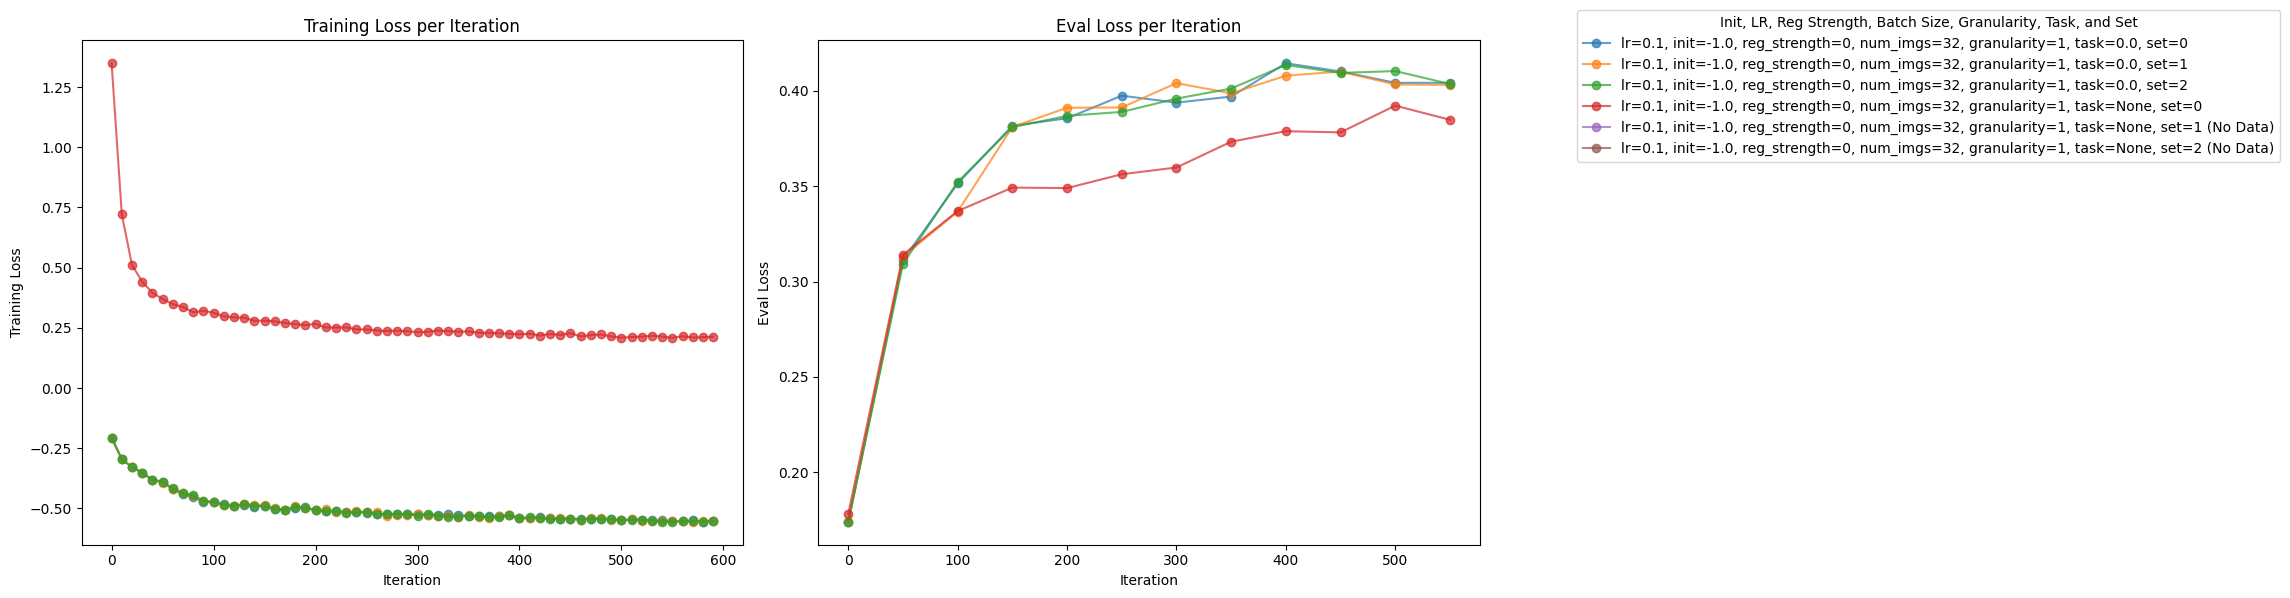

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
#df = df[df["granularity"] == 1]
#df = df[df["iter"] >= 50]
# First plot for training loss
df2 = df[~df["train_loss"].isna()]
grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'iter', 'granularity', 'task', 'set'], dropna=False).agg({'train_loss': 'mean'}).reset_index()

lr_values = grouped_df['lr'].unique()
init_values = grouped_df['init'].unique()
reg_strength_values = grouped_df['reg_strength'].unique()
images_per_batch_values = grouped_df['images_per_batch'].unique()
granularity_values = grouped_df['granularity'].unique()
task_values = grouped_df['task'].unique()
set_values = grouped_df['set'].unique()

for lr in lr_values:
    for init in init_values:
        for reg_strength in reg_strength_values:
            for images_per_batch in images_per_batch_values:
                for granularity in granularity_values:
                    for task in task_values:
                        for set_val in set_values:
                            subset = grouped_df[(grouped_df['lr'] == lr) & (grouped_df['init'] == init) & (grouped_df['reg_strength'] == reg_strength) & (grouped_df['images_per_batch'] == images_per_batch) & (grouped_df['granularity'] == granularity) & (grouped_df['task'] == task) & (grouped_df['set'] == set_val)]
                            if not subset.empty:
                                axs[0].plot(subset['iter'], subset['train_loss'], marker='o', label=f'lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}, task={task}, set={set_val}', alpha=0.7)
                            else:
                                axs[0].plot([], [], marker='o', label=f'lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}, task={task}, set={set_val} (No Data)', alpha=0.7)

axs[0].set_title('Training Loss per Iteration')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Training Loss')

# Second plot for eval loss
df2 = df[df["train_loss"].isna()]
grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'iter', 'granularity', 'task', 'set'], dropna=False).agg({'eval_loss': 'mean'}).reset_index()

for lr in lr_values:
    for init in init_values:
        for reg_strength in reg_strength_values:
            for images_per_batch in images_per_batch_values:
                for granularity in granularity_values:
                    for task in task_values:
                        for set_val in set_values:
                            subset = grouped_df[(grouped_df['lr'] == lr) & (grouped_df['init'] == init) & (grouped_df['reg_strength'] == reg_strength) & (grouped_df['images_per_batch'] == images_per_batch) & (grouped_df['granularity'] == granularity) & (grouped_df['task'] == task) & (grouped_df['set'] == set_val)]
                            if not subset.empty:
                                axs[1].plot(subset['iter'], subset['eval_loss'], marker='o', alpha=0.7)
                            else:
                                axs[1].plot([], [], marker='o', alpha=0.7)

axs[1].set_title('Eval Loss per Iteration')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Eval Loss')

# Adjust legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Init, LR, Reg Strength, Batch Size, Granularity, Task, and Set', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [7]:
with open('/home/ahojel/visual_prompting_vid/output_dir8/rl_multitask_task1/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    curr  = eval(line.strip())
    curr["set"] = 1
    try:
        data2.append(curr)
    except:
        continue
df = pd.DataFrame(data2)

In [8]:
df.loc[df["task"].isna(), "task"] = "None"


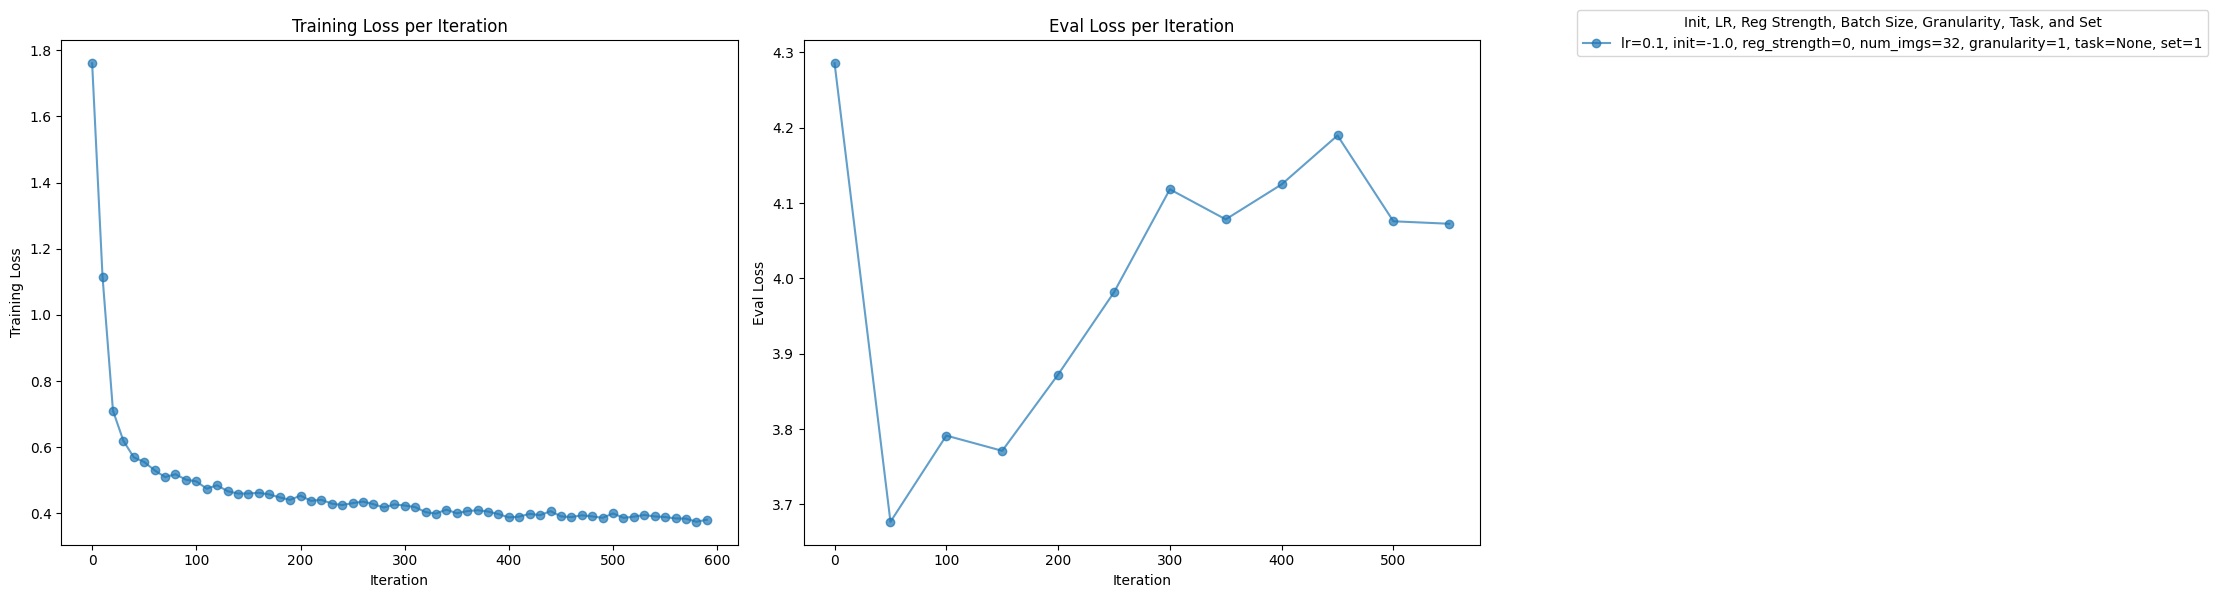

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
#df = df[df["granularity"] == 1]
#df = df[df["iter"] >= 50]
# First plot for training loss
df2 = df[~df["train_loss"].isna()]
grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'iter', 'granularity', 'task', 'set'], dropna=False).agg({'train_loss': 'mean'}).reset_index()

lr_values = grouped_df['lr'].unique()
init_values = grouped_df['init'].unique()
reg_strength_values = grouped_df['reg_strength'].unique()
images_per_batch_values = grouped_df['images_per_batch'].unique()
granularity_values = grouped_df['granularity'].unique()
task_values = grouped_df['task'].unique()
set_values = grouped_df['set'].unique()

for lr in lr_values:
    for init in init_values:
        for reg_strength in reg_strength_values:
            for images_per_batch in images_per_batch_values:
                for granularity in granularity_values:
                    for task in task_values:
                        for set_val in set_values:
                            subset = grouped_df[(grouped_df['lr'] == lr) & (grouped_df['init'] == init) & (grouped_df['reg_strength'] == reg_strength) & (grouped_df['images_per_batch'] == images_per_batch) & (grouped_df['granularity'] == granularity) & (grouped_df['task'] == task) & (grouped_df['set'] == set_val)]
                            if not subset.empty:
                                axs[0].plot(subset['iter'], subset['train_loss'], marker='o', label=f'lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}, task={task}, set={set_val}', alpha=0.7)
                            else:
                                axs[0].plot([], [], marker='o', label=f'lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}, task={task}, set={set_val} (No Data)', alpha=0.7)

axs[0].set_title('Training Loss per Iteration')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Training Loss')

# Second plot for eval loss
df2 = df[df["train_loss"].isna()]
grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'iter', 'granularity', 'task', 'set'], dropna=False).agg({'eval_loss': 'mean'}).reset_index()

for lr in lr_values:
    for init in init_values:
        for reg_strength in reg_strength_values:
            for images_per_batch in images_per_batch_values:
                for granularity in granularity_values:
                    for task in task_values:
                        for set_val in set_values:
                            subset = grouped_df[(grouped_df['lr'] == lr) & (grouped_df['init'] == init) & (grouped_df['reg_strength'] == reg_strength) & (grouped_df['images_per_batch'] == images_per_batch) & (grouped_df['granularity'] == granularity) & (grouped_df['task'] == task) & (grouped_df['set'] == set_val)]
                            if not subset.empty:
                                axs[1].plot(subset['iter'], subset['eval_loss'], marker='o', alpha=0.7)
                            else:
                                axs[1].plot([], [], marker='o', alpha=0.7)

axs[1].set_title('Eval Loss per Iteration')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Eval Loss')

# Adjust legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Init, LR, Reg Strength, Batch Size, Granularity, Task, and Set', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [76]:
with open('/home/ahojel/visual_prompting_vid/output_dir8/rl_replace_0/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    curr  = eval(line.strip())
    curr["set"] = 1
    try:
        data2.append(curr)
    except:
        continue
df = pd.DataFrame(data2)

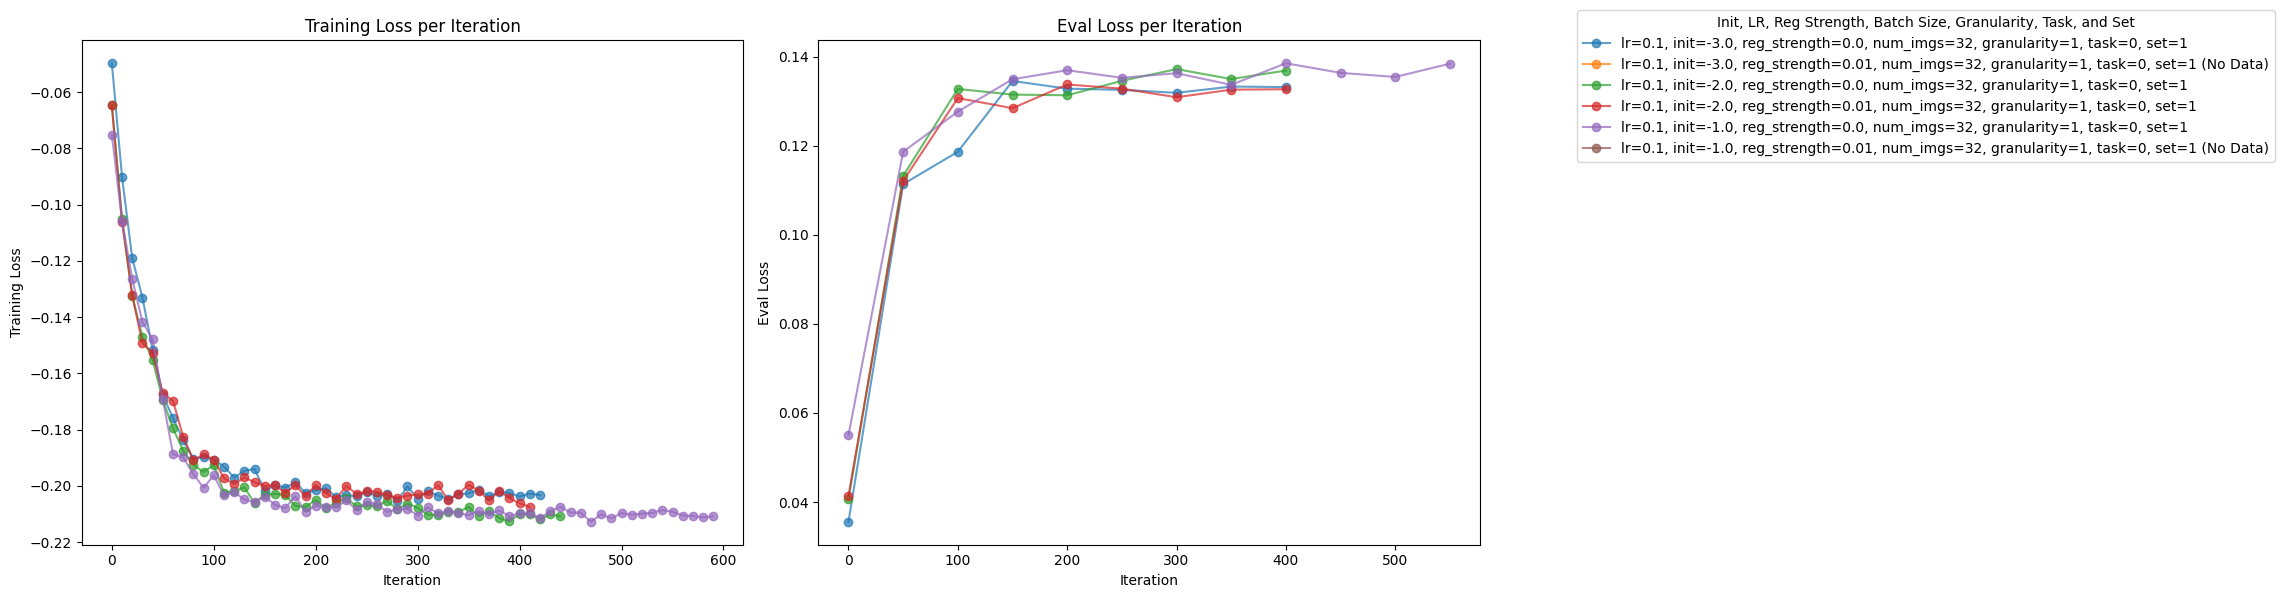

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
#df = df[df["granularity"] == 1]
#df = df[df["iter"] >= 50]
# First plot for training loss
df2 = df[~df["train_loss"].isna()]
grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'iter', 'granularity', 'task', 'set'], dropna=False).agg({'train_loss': 'mean'}).reset_index()

lr_values = grouped_df['lr'].unique()
init_values = grouped_df['init'].unique()
reg_strength_values = grouped_df['reg_strength'].unique()
images_per_batch_values = grouped_df['images_per_batch'].unique()
granularity_values = grouped_df['granularity'].unique()
task_values = grouped_df['task'].unique()
set_values = grouped_df['set'].unique()

for lr in lr_values:
    for init in init_values:
        for reg_strength in reg_strength_values:
            for images_per_batch in images_per_batch_values:
                for granularity in granularity_values:
                    for task in task_values:
                        for set_val in set_values:
                            subset = grouped_df[(grouped_df['lr'] == lr) & (grouped_df['init'] == init) & (grouped_df['reg_strength'] == reg_strength) & (grouped_df['images_per_batch'] == images_per_batch) & (grouped_df['granularity'] == granularity) & (grouped_df['task'] == task) & (grouped_df['set'] == set_val)]
                            if not subset.empty:
                                axs[0].plot(subset['iter'], subset['train_loss'], marker='o', label=f'lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}, task={task}, set={set_val}', alpha=0.7)
                            else:
                                axs[0].plot([], [], marker='o', label=f'lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}, task={task}, set={set_val} (No Data)', alpha=0.7)

axs[0].set_title('Training Loss per Iteration')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Training Loss')

# Second plot for eval loss
df2 = df[df["train_loss"].isna()]
grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'iter', 'granularity', 'task', 'set'], dropna=False).agg({'eval_loss': 'mean'}).reset_index()

for lr in lr_values:
    for init in init_values:
        for reg_strength in reg_strength_values:
            for images_per_batch in images_per_batch_values:
                for granularity in granularity_values:
                    for task in task_values:
                        for set_val in set_values:
                            subset = grouped_df[(grouped_df['lr'] == lr) & (grouped_df['init'] == init) & (grouped_df['reg_strength'] == reg_strength) & (grouped_df['images_per_batch'] == images_per_batch) & (grouped_df['granularity'] == granularity) & (grouped_df['task'] == task) & (grouped_df['set'] == set_val)]
                            if not subset.empty:
                                axs[1].plot(subset['iter'], subset['eval_loss'], marker='o', alpha=0.7)
                            else:
                                axs[1].plot([], [], marker='o', alpha=0.7)

axs[1].set_title('Eval Loss per Iteration')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Eval Loss')

# Adjust legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Init, LR, Reg Strength, Batch Size, Granularity, Task, and Set', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [81]:
import json

In [92]:
with open('/home/ahojel/visual_prompting_vid/output_dir8/cma_multitask_1/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    curr  = eval(line.strip())
    try:
        data2.append(curr)
    except:
        continue
df = pd.DataFrame(data2)

TypeError: 'numpy.ndarray' object is not callable

In [96]:
import ast

with open('/home/ahojel/visual_prompting_vid/output_dir8/cma_multitask_1/log.txt', 'r') as file:
    data = file.readlines()

data2 = []
for line in data:
    curr = ast.literal_eval(line.strip())
    data2.append(curr)

df = pd.DataFrame(data2)

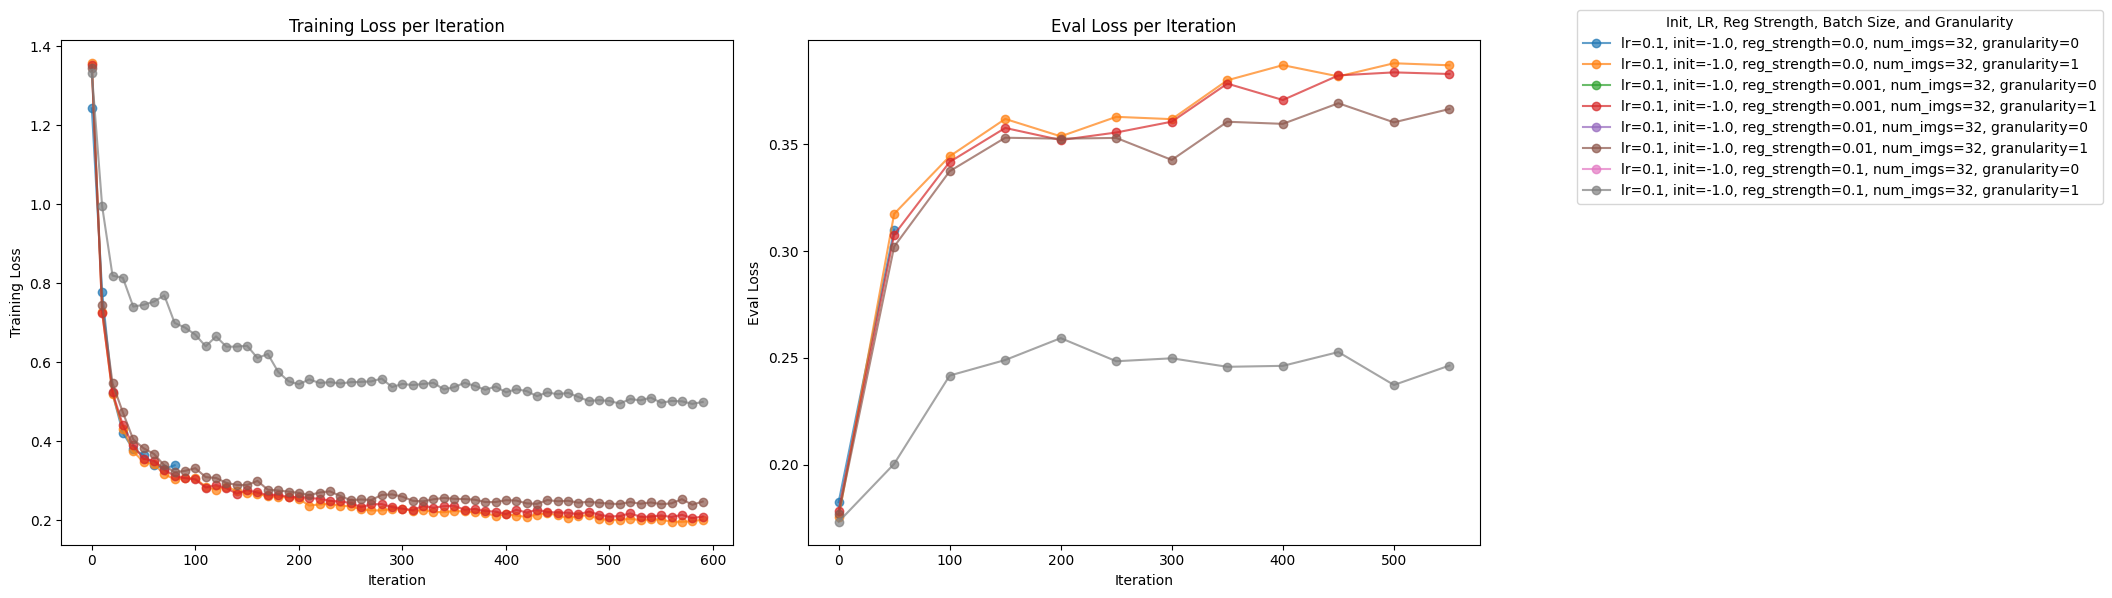

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# First plot for training loss
df2 = df[~df["train_loss"].isna()]
grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'granularity', 'iter']).agg({'train_loss': 'mean'}).reset_index()

lr_values = grouped_df['lr'].unique()
init_values = grouped_df['init'].unique()
reg_strength_values = grouped_df['reg_strength'].unique()
images_per_batch_values = grouped_df['images_per_batch'].unique()
granularity_values = grouped_df['granularity'].unique()

for lr in lr_values:
    for init in init_values:
        for reg_strength in reg_strength_values:
            for images_per_batch in images_per_batch_values:
                for granularity in granularity_values:
                    subset = grouped_df[(grouped_df['lr'] == lr) & (grouped_df['init'] == init) & (grouped_df['reg_strength'] == reg_strength) & (grouped_df['images_per_batch'] == images_per_batch) & (grouped_df['granularity'] == granularity)]
                    axs[0].plot(subset['iter'], subset['train_loss'], marker='o', label=f'lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}', alpha=0.7)

axs[0].set_title('Training Loss per Iteration')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Training Loss')

# Second plot for eval loss
df2 = df[df["train_loss"].isna()]
grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'granularity', 'iter']).agg({'eval_loss': 'mean'}).reset_index()

for lr in lr_values:
    for init in init_values:
        for reg_strength in reg_strength_values:
            for images_per_batch in images_per_batch_values:
                for granularity in granularity_values:
                    subset = grouped_df[(grouped_df['lr'] == lr) & (grouped_df['init'] == init) & (grouped_df['reg_strength'] == reg_strength) & (grouped_df['images_per_batch'] == images_per_batch) & (grouped_df['granularity'] == granularity)]
                    axs[1].plot(subset['iter'], subset['eval_loss'], marker='o', alpha=0.7)

axs[1].set_title('Eval Loss per Iteration')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Eval Loss')

# Adjust legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Init, LR, Reg Strength, Batch Size, and Granularity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [84]:

# First plot for training loss
df2 = df[~df["train_loss"].isna()]
grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'granularity', 'iter']).agg({'train_loss': 'mean'}).reset_index()

lr_values = grouped_df['lr'].unique()
init_values = grouped_df['init'].unique()
reg_strength_values = grouped_df['reg_strength'].unique()
images_per_batch_values = grouped_df['images_per_batch'].unique()
granularity_values = grouped_df['granularity'].unique()

# Skipping the plotting of training loss as it's not relevant to the edit prompt

# Second plot for eval loss
df2 = df[df["train_loss"].isna()]
grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'granularity', 'iter']).agg({'eval_loss': 'mean'}).reset_index()

# Print eval loss values for iter=250 for each grouping
iter_250_eval_loss = grouped_df[grouped_df['iter'] == 550]
for index, row in iter_250_eval_loss.iterrows():
    print(f"lr={row['lr']}, init={row['init']}, reg_strength={row['reg_strength']}, images_per_batch={row['images_per_batch']}, granularity={row['granularity']}, iter=250, eval_loss={row['eval_loss']}")



lr=0.1, init=-1.0, reg_strength=0.0, images_per_batch=32.0, granularity=1.0, iter=250, eval_loss=0.3905005406308919
lr=0.1, init=-1.0, reg_strength=0.001, images_per_batch=32.0, granularity=1.0, iter=250, eval_loss=0.3868080821353942
lr=0.1, init=-1.0, reg_strength=0.01, images_per_batch=32.0, granularity=1.0, iter=250, eval_loss=0.37009850922040644
lr=0.1, init=-1.0, reg_strength=0.1, images_per_batch=32.0, granularity=1.0, iter=250, eval_loss=0.24627083969535307


In [40]:
import pickle
with open('/home/ahojel/visual_prompting_vid/output_dir5/random_zeroshot.pkl', 'wb') as file:
    pickle.dump(tensor, file)


In [119]:
holder.mean(-1).shape

torch.Size([32, 16])

In [118]:
holder.shape

torch.Size([32, 16, 3])

In [106]:
len(sigmoid_tensor)

1152

In [ ]:
file_paths = [
    '/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test/bernoullis_0_1_0_32_0.1_-1.0_400.pkl',
    '/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test1/bernoullis_0_1_0_32_0.1_-1.0_400.pkl',
    '/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test2/bernoullis_0_1_0_32_0.1_-1.0_400.pkl'
]

In [72]:
tensor.shape

(1152,)

In [74]:
ranking_holder.reshape(-1).shape

torch.Size([1536])

/tmp/ipykernel_1618475/2758358846.py:19: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402379298/work/aten/src/ATen/native/IndexingUtils.h:27.)
  ranking_holder_nonan = ranking_holder[~np.isnan(ranking_holder)]


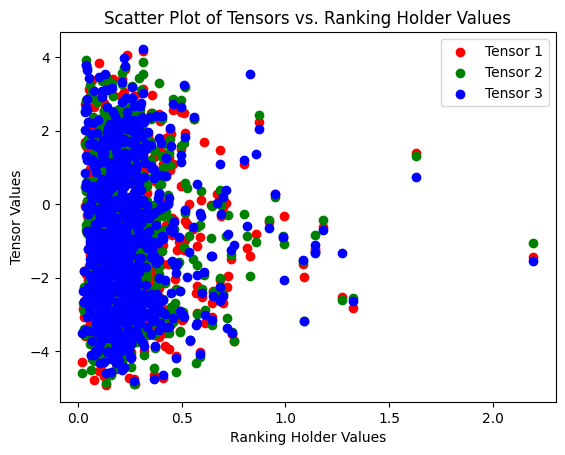

In [75]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load tensors from the pickle files
file_paths = [
    '/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test/bernoullis_0_1_0_32_0.1_-1.0_400.pkl',
    '/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test1/bernoullis_0_1_0_32_0.1_-1.0_400.pkl',
    '/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test2/bernoullis_0_1_0_32_0.1_-1.0_400.pkl'
]

tensors = []
for file_path in file_paths:
    with open(file_path, 'rb') as file:
        tensors.append(pickle.load(file))

# Assuming ranking_holder is available and loaded previously
# Remove NaN values from ranking_holder for plotting
ranking_holder_nonan = ranking_holder[~np.isnan(ranking_holder)]

# Plotting the tensors against the same ranking_holder without NaN values
colors = ['r', 'g', 'b']  # Different colors for each tensor
for i, tensor in enumerate(tensors):
    if isinstance(tensor, list):
        tensor = np.array(tensor)  # Convert list to numpy array for reshape operation
    # Ensure tensor is reshaped to match the non-NaN ranking_holder's shape for plotting
    tensor_nonan = tensor[~np.isnan(tensor)]
    plt.scatter(ranking_holder_nonan.reshape(-1)[:len(tensor_nonan)], tensor_nonan.reshape(-1), color=colors[i], label=f'Tensor {i+1}')
plt.xlabel('Ranking Holder Values')
plt.ylabel('Tensor Values')
plt.title('Scatter Plot of Tensors vs. Ranking Holder Values')
plt.legend()
plt.show()


In [104]:
torch.tensor(df["averages"][0])[:-1].reshape(32,16)


tensor([[ 1.9618e-03, -2.9692e-02, -1.5754e-01, -1.9525e-02,  9.8847e-02,
          9.0380e-02,  1.5646e-02,  4.5023e-02,  5.4696e-02,  5.2811e-02,
         -3.0423e-01,  9.3622e-02, -9.2273e-02, -1.0417e-01, -7.1623e-02,
         -9.4357e-02],
        [ 1.4430e-02, -2.1075e-01,  4.3840e-02,  4.3382e-02,  4.8992e-02,
          3.8639e-02,  3.6330e-02,  5.5009e-02,  3.1876e-02,  3.1876e-02,
          3.1876e-02,  3.1876e-02,  3.1876e-02,  3.1876e-02,  3.1876e-02,
          3.1876e-02],
        [ 1.1037e-02, -1.5519e-01,  4.0797e-02, -1.9031e-02, -7.0037e-02,
         -1.8689e-02,  5.4140e-03, -1.3672e-02, -7.9387e-03, -5.9554e-02,
         -2.7553e-01,  8.7961e-02, -3.3258e-02, -1.9359e-02,  1.0308e-02,
          3.2261e-02],
        [-1.6891e-01,  3.1570e-02,  5.3873e-02,  3.3093e-02,  1.8118e-02,
         -1.4699e-02,  3.7010e-02, -8.7030e-03,  3.1876e-02,  3.1876e-02,
          3.1876e-02,  3.1876e-02,  3.1876e-02,  3.1876e-02,  3.1876e-02,
          3.1876e-02],
        [ 2.6212e-02

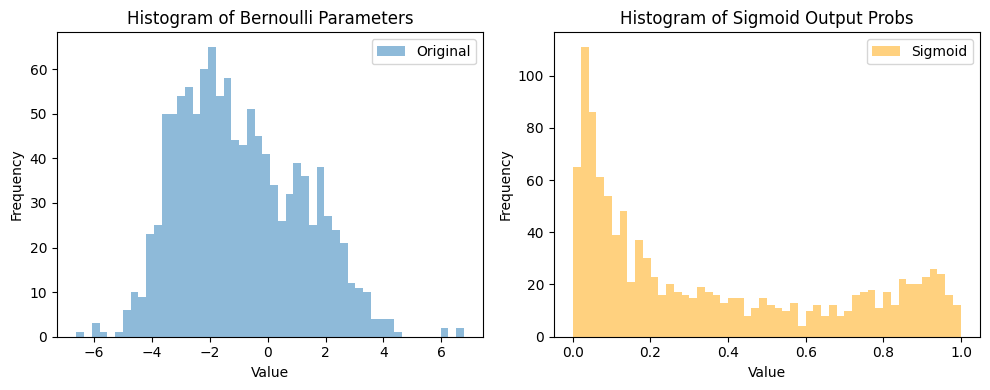

In [18]:
import torch
tensor = np.array(tensor)
sigmoid_tensor = 1 / (1 + np.exp(-tensor))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(tensor, bins=50, alpha=0.5, label='Original')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Bernoulli Parameters')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(sigmoid_tensor, bins=50, alpha=0.5, color='orange', label='Sigmoid')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.title('Histogram of Sigmoid Output Probs')
plt.legend()

plt.tight_layout()


In [62]:
holder = torch.full((32, 16, 3), float('nan'))

for element in range(len(sigmoid_tensor)):
    index = element
    total_elements_per_layer_first_24_heads = 16 * 2  # 16 layers, 2 elements per layer
    total_elements_per_layer_next_8_heads = 16 * 3  # 16 layers, 3 elements per layer
    total_elements_first_24_heads = 24 * total_elements_per_layer_first_24_heads
    
    if index < total_elements_first_24_heads:
        head = index // total_elements_per_layer_first_24_heads
        layer = (index % total_elements_per_layer_first_24_heads) // 2
        quadrant = index % 2
    else:
        adjusted_index = index - total_elements_first_24_heads
        head = 24 + (adjusted_index // total_elements_per_layer_next_8_heads)
        layer = (adjusted_index % total_elements_per_layer_next_8_heads) // 3
        quadrant = adjusted_index % 3

    holder[head,layer,quadrant] = sigmoid_tensor[element].item()

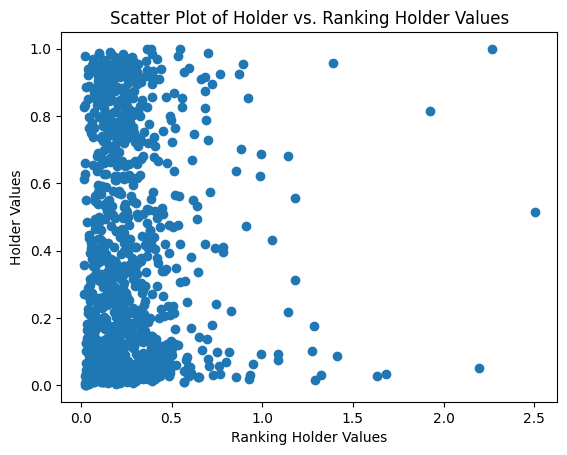

In [67]:
plt.scatter(ranking_holder.reshape(-1), holder.reshape(-1))
plt.xlabel('Ranking Holder Values')
plt.ylabel('Holder Values')
plt.title('Scatter Plot of Holder vs. Ranking Holder Values')
plt.show()


In [65]:
ranking_holder.reshape(-1)

tensor([1.1400, 0.6408,    nan,  ..., 0.5466, 0.2395, 0.3350])

In [110]:
smallest_values_coordinates

[(tensor(20), tensor(0)),
 (tensor(4), tensor(1)),
 (tensor(20), tensor(1)),
 (tensor(13), tensor(5)),
 (tensor(13), tensor(3)),
 (tensor(10), tensor(0)),
 (tensor(26), tensor(6)),
 (tensor(0), tensor(10)),
 (tensor(22), tensor(10)),
 (tensor(2), tensor(10))]

In [109]:
indices_of_smallest_values = torch.topk(rounded_tensor2.view(-1), 10, largest=False).indices
# Convert flat indices to coordinates in the (32, 16) space
smallest_values_coordinates = [(index // 16, index % 16) for index in indices_of_smallest_values]


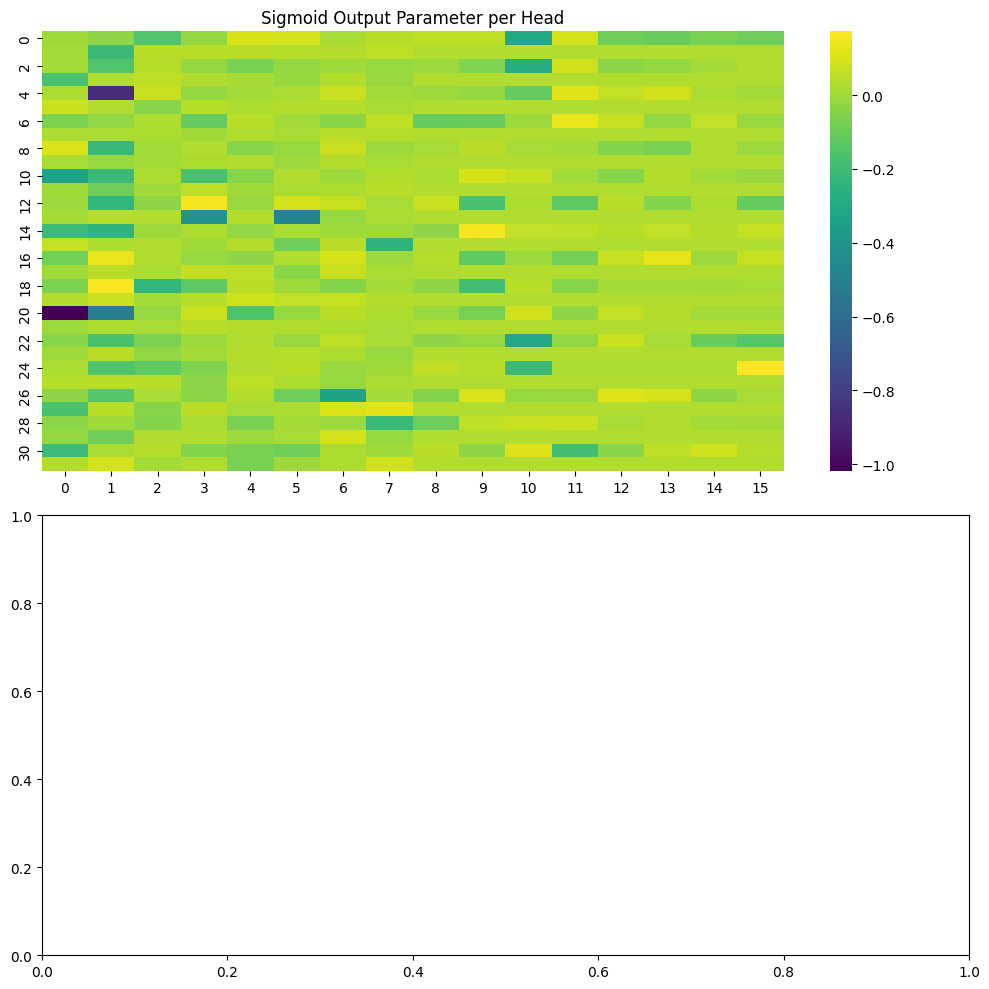

In [105]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # Create 2 plots one on top of the other

rounded_tensor2 = torch.tensor(df["averages"][0])[:-1].reshape(32,16)

sns.heatmap(rounded_tensor2, cmap='viridis', cbar=True, ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Sigmoid Output Parameter per Head')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()


/tmp/ipykernel_1618475/2199796037.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rounded_tensor = torch.tensor(holder).reshape(32, 16, 3)
/tmp/ipykernel_1618475/2199796037.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rounded_tensor = torch.tensor(holder).reshape(32, 16*3)


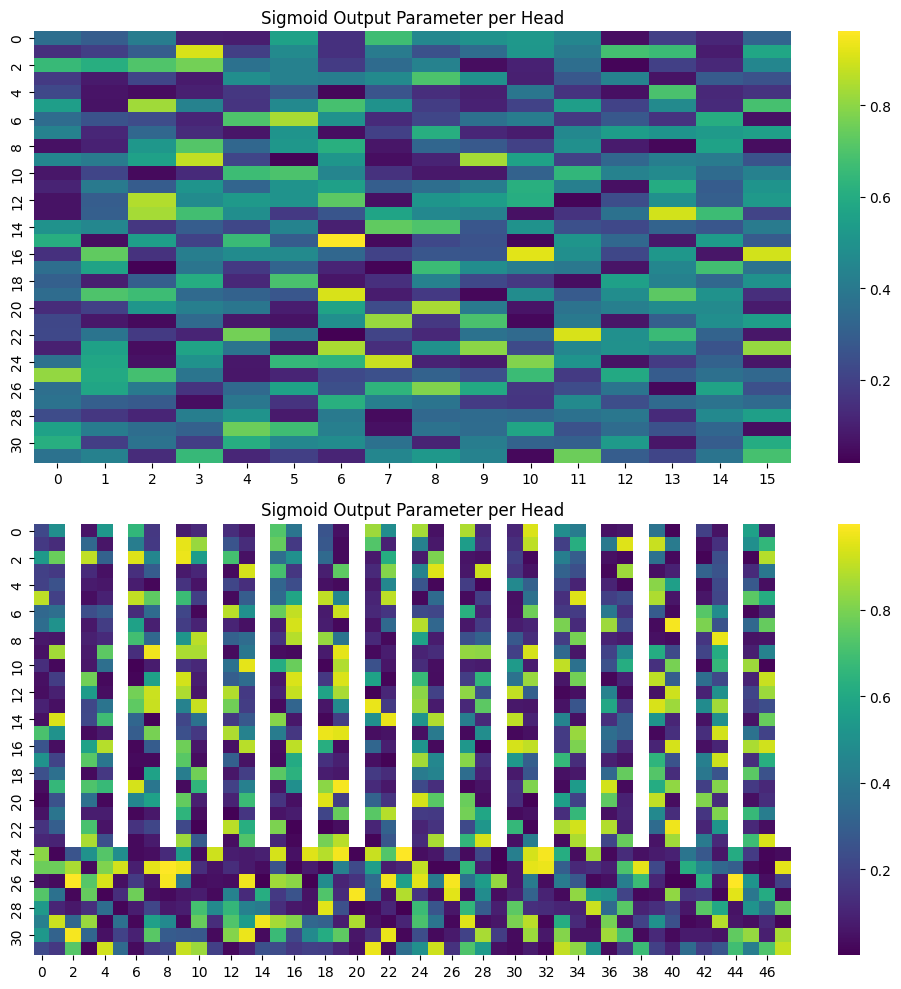

In [66]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # Create 2 plots one on top of the other

rounded_tensor = torch.tensor(holder).reshape(32, 16, 3)
rounded_tensor2 = torch.nanmean(rounded_tensor, dim=-1)
sns.heatmap(rounded_tensor2, cmap='viridis', cbar=True, ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Sigmoid Output Parameter per Head')

rounded_tensor = torch.tensor(holder).reshape(32, 16*3)
sns.heatmap(rounded_tensor, cmap='viridis', cbar=True, ax=axs[1])  # Plot on the second subplot
axs[1].set_title('Sigmoid Output Parameter per Head')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()


In [59]:
with open('/home/ahojel/visual_prompting_vid/master_rankings.pkl', 'rb') as f:
    master = pickle.load(f)

encoder_coordinates = master["encoder"]["coords"]
decoder_coordinates = master["decoder"]["coords"]

encoder_values = master["encoder"]["values"]
decoder_values = master["decoder"]["values"]

q1 = calculate_quadrant_indices(14, 14, 1)
q2 = calculate_quadrant_indices(14, 14, 2)
q3 = calculate_quadrant_indices(14, 14, 3)
q4 = calculate_quadrant_indices(14, 14, 4)

filtered_encoder_coordinates = []
filtered_encoder_values = []
for encoder_element in range(len(encoder_coordinates)):
    if encoder_coordinates[encoder_element][-1] >= 99:
        filtered_encoder_coordinates.append([encoder_coordinates[encoder_element][0], encoder_coordinates[encoder_element][1], encoder_coordinates[encoder_element][2]-98])
        filtered_encoder_values.append(encoder_values[encoder_element])
    elif encoder_coordinates[encoder_element][-1] == 0:
        filtered_encoder_coordinates.append([encoder_coordinates[encoder_element][0], encoder_coordinates[encoder_element][1], encoder_coordinates[encoder_element][2]])
        filtered_encoder_values.append(encoder_values[encoder_element])

filtered_decoder_coordinates = []
filtered_decoder_values = []

for decoder_element in range(len(decoder_coordinates)):
    pos = decoder_coordinates[decoder_element][-1]
    if pos-1 in q3:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]-98])
        filtered_decoder_values.append(decoder_values[decoder_element])
    if pos-1 in q4:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]-98])
        filtered_decoder_values.append(decoder_values[decoder_element])
    elif pos == 0:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]])
        filtered_decoder_values.append(decoder_values[decoder_element])



# Combine encoder and decoder coordinates and values, then sort them based on the values to get a global ranking
groups_holder = {}
for area_type in ["both"]:#, "decoder", "encoder"]:
    if area_type == "both":
        combined_coords_values = list(zip(filtered_encoder_coordinates + filtered_decoder_coordinates, filtered_encoder_values + filtered_decoder_values))
    elif area_type == "decoder":
        combined_coords_values = list(zip(filtered_decoder_coordinates, filtered_decoder_values))
    elif area_type == "encoder":
        combined_coords_values = list(zip(filtered_encoder_coordinates, filtered_encoder_values))

    combined_coords_values = list(zip(encoder_coordinates + decoder_coordinates, encoder_values + decoder_values))
    
    coords_headrank, group_averages = rank_coordinates_zipped(combined_coords_values)
    coords_quadrank, fine_grained_averages = rank_coordinates_fine_grained(combined_coords_values, q1, q2, q3, q4)
    combined_coords_values.sort(key=lambda x: x[1], reverse=True)  # Assuming higher values have higher ranks

holder = torch.full((32, 16, 3), float('nan'))


for i in fine_grained_averages:
    holder[i[0][0],i[0][1],0 if i[1] == 'q0' else 1 if i[1] == 'q1' else 2]= fine_grained_averages[i]


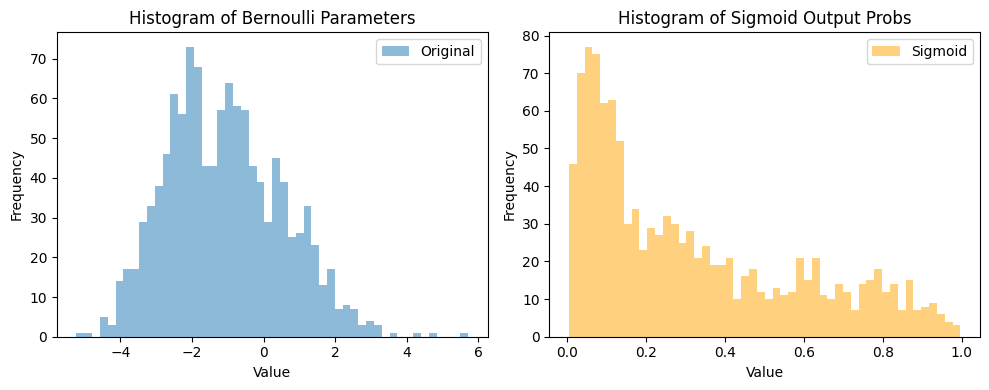

In [38]:
tensor = np.array(tensor)
sigmoid_tensor = 1 / (1 + np.exp(-tensor))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(tensor, bins=50, alpha=0.5, label='Original')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Bernoulli Parameters')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(sigmoid_tensor, bins=50, alpha=0.5, color='orange', label='Sigmoid')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.title('Histogram of Sigmoid Output Probs')
plt.legend()

plt.tight_layout()


In [44]:
np.sum(sigmoid_tensor > 0.5)


157

In [15]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

# Define file paths for the new pickle files
file_paths = [
    '/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test/bernoullis_0_1_0_32_0.1_-1.0_400.pkl',
    '/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test1/bernoullis_0_1_0_32_0.1_-1.0_400.pkl',
    '/home/ahojel/visual_prompting_vid/output_dir8/rl_start_test2/bernoullis_0_1_0_32_0.1_-1.0_400.pkl'
]

# Initialize a list to hold the sum across the second dimension for each tensor
sum_across_second_dim_list = []

# Loop through each file path, load the tensor, process it, and store the sum across the second dimension
for file_path in file_paths:
    with open(file_path, 'rb') as file:
        tensor = pickle.load(file)
    
    tensor = np.array(tensor)
    sigmoid_tensor = 1 / (1 + np.exp(-tensor))
    rounded_tensor = torch.tensor(sigmoid_tensor).reshape(32,16)
    sum_across_second_dim = torch.sum(rounded_tensor, dim=1)
    sum_across_second_dim_list.append(sum_across_second_dim)

# Plot each tensor's sum across the second dimension on the same graph
plt.figure(figsize=(10, 5))
#batch_sizes = ['32', '8', '16', '64']
for i, sum_across_second_dim in enumerate(sum_across_second_dim_list):
    plt.plot(range(32), sum_across_second_dim.numpy(), marker='o', linestyle='-', label=f'img in batch')
plt.xlabel('Layer')
plt.ylabel('Sum of Probs')
plt.title('Sum of Probs per Layer for Different Batch Sizes')
plt.legend()
plt.show()

RuntimeError: shape '[32, 16]' is invalid for input of size 1152

In [ ]:
plt.figure(figsize=(10, 5))
batch_sizes = ['32', '8', '16', '64']
for i, sum_across_second_dim in enumerate(sum_across_second_dim_list):
    plt.plot(range(32), sum_across_second_dim.numpy(), marker='o', linestyle='-', label=f'{batch_sizes[i]} img in batch')
plt.xlabel('Layer')
plt.ylabel('Sum of Probs')
plt.title('Sum of Probs per Layer for Different Batch Sizes')
plt.legend()
plt.show()

In [ ]:
holder.mean(-1)

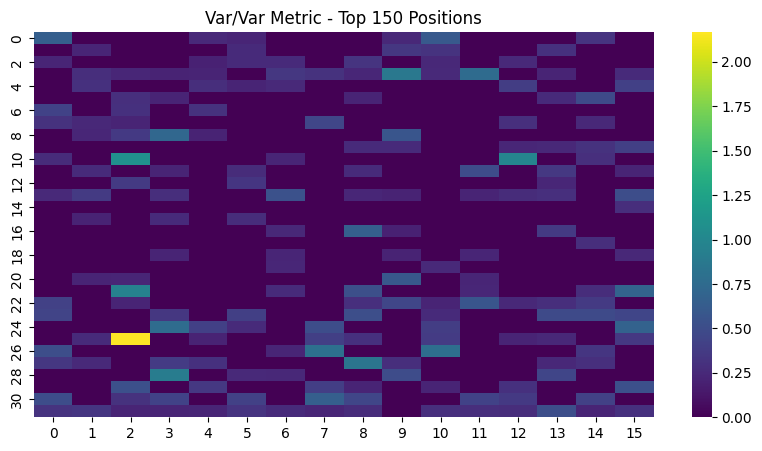

In [ ]:
# Mask all but the top 150 positions in tensor_map
top_150_mask = tensor_map.flatten().sort(descending=True).indices[:193]
masked_tensor_map = torch.zeros_like(tensor_map).flatten()
masked_tensor_map[top_150_mask] = tensor_map.flatten()[top_150_mask]
masked_tensor_map = masked_tensor_map.reshape(32, 16)

plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
sns.heatmap(masked_tensor_map, cmap='viridis', cbar=True)
plt.title('Var/Var Metric - Top 150 Positions')
plt.show()


In [27]:
from collections import defaultdict

def rank_coordinates_zipped(coord_value_pairs):
    # Unzip the list of pairs into separate lists
    coordinates, values = zip(*coord_value_pairs)
    
    # Group coordinates by (x, y)
    groups = defaultdict(list)
    for coord, value in zip(coordinates, values):
        groups[tuple(coord[:2])].append((coord[2], value))
    
    # Calculate average value for each group
    group_averages = {group: np.mean([value for _, value in members]) for group, members in groups.items()}
    
    # Sort groups by their average value in descending order
    sorted_group_averages = sorted(group_averages.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_group_averages

with open('/home/ahojel/visual_prompting_vid/master_rankings.pkl', 'rb') as f:
    master = pickle.load(f)

encoder_coordinates = master["encoder"]["coords"]
decoder_coordinates = master["decoder"]["coords"]

encoder_values = master["encoder"]["values"]
decoder_values = master["decoder"]["values"]

combined_coords_values = list(zip(encoder_coordinates + decoder_coordinates, encoder_values + decoder_values))
coords_headrank = rank_coordinates_zipped(combined_coords_values)

tensor_map = torch.zeros(32, 16)
for coords, value in coords_headrank:
    x, y = coords
    tensor_map[x, y] = value
tensor_map



tensor([[0.6442, 0.1362, 0.1661, 0.1801, 0.2458, 0.2241, 0.0575, 0.0344, 0.1989,
         0.2388, 0.5991, 0.1231, 0.1129, 0.1211, 0.3223, 0.1013],
        [0.0327, 0.2238, 0.0427, 0.1548, 0.0313, 0.2586, 0.0458, 0.1296, 0.0302,
         0.3441, 0.3153, 0.0264, 0.1976, 0.2987, 0.0365, 0.0221],
        [0.2258, 0.0935, 0.1927, 0.1539, 0.2013, 0.2617, 0.2586, 0.1899, 0.3277,
         0.1362, 0.2398, 0.0426, 0.2481, 0.1824, 0.1467, 0.1151],
        [0.1652, 0.2871, 0.2329, 0.2088, 0.2196, 0.1808, 0.3458, 0.3122, 0.2337,
         0.8683, 0.2502, 0.7462, 0.1563, 0.2159, 0.1968, 0.2618],
        [0.1446, 0.3005, 0.1332, 0.1266, 0.2804, 0.2133, 0.2498, 0.0812, 0.1165,
         0.1897, 0.1358, 0.1479, 0.3856, 0.0801, 0.0771, 0.4102],
        [0.1328, 0.0617, 0.2929, 0.2167, 0.1670, 0.1370, 0.1914, 0.1334, 0.2142,
         0.0353, 0.1873, 0.0613, 0.0393, 0.2544, 0.4906, 0.1863],
        [0.4270, 0.1698, 0.2992, 0.0462, 0.3126, 0.1471, 0.0406, 0.1693, 0.0501,
         0.1485, 0.0609, 0.1946, 0.14

In [28]:
def calculate_quadrant_indices(rows, cols, quadrant):
    """
    Calculate the start and end indices for each quadrant in the flattened tensor.
    """
    row_start, row_end = 0, 7
    col_start, col_end = 0, 7
    
    if quadrant == 2:  # Top Right
        col_start, col_end = 7, 14
    elif quadrant == 3:  # Bottom Left
        row_start, row_end = 7, 14
    elif quadrant == 4:  # Bottom Right
        row_start, row_end = 7, 14
        col_start, col_end = 7, 14

    indices = []
    for row in range(row_start, row_end):
        for col in range(col_start, col_end):
            index = row * rows + col
            indices.append(index)
    
    return indices



In [29]:

def determine_quartile(z, q1, q2, q3, q4):
    """Determine the quartile group for a given z value."""
    holder = z
    z = z[-1]
    if holder[0]<=23:
        if z == 0:
            return 'q0'
        else:
            return 'q1'
    else:
        if z == 0:
            return 'q0'
        elif z-1 in q1:
            return 'q1'
        elif z-1 in q2:
            return 'q2'

def rank_coordinates_fine_grained(coord_value_pairs, q1, q2, q3, q4):
    # Unzip the list of pairs into separate lists
    coordinates, values = zip(*coord_value_pairs)
    
    # Group coordinates by (x, y) and then by quartile
    groups = defaultdict(lambda: defaultdict(list))
    for coord, value in zip(coordinates, values):
        xy_group = tuple(coord[:2])
        quartile = determine_quartile(coord, q1, q2, q3, q4)
        groups[xy_group][quartile].append((coord[2], value))
    
    # Calculate average value for each fine-grained group and sort groups by this average
    fine_grained_averages = {}
    for xy_group, quartiles in groups.items():
        for quartile, members in quartiles.items():
            avg = np.mean([value for _, value in members])
            fine_grained_averages[(xy_group, quartile)] = avg
    
    sorted_fine_grained_groups = sorted(fine_grained_averages.keys(), key=lambda x: fine_grained_averages[x], reverse=True)
    
    # Sort members within each fine-grained group by their z value
    for xy_group, quartiles in groups.items():
        for quartile in quartiles:
            quartiles[quartile] = sorted(quartiles[quartile], key=lambda x: x[0])
    
    # Compile the ranked list based on fine-grained group average and then by z within each group
    ranked_list = []
    for group in sorted_fine_grained_groups:
        xy_group, quartile = group
        for z, _ in groups[xy_group][quartile]:
            ranked_list.append([*xy_group, z])
    
    return ranked_list, fine_grained_averages


def rank_coordinates_zipped(coord_value_pairs):
    # Unzip the list of pairs into separate lists
    coordinates, values = zip(*coord_value_pairs)
    
    # Group coordinates by (x, y)
    groups = defaultdict(list)
    for coord, value in zip(coordinates, values):
        groups[tuple(coord[:2])].append((coord[2], value))
    
    # Calculate average value for each group and sort groups by this average
    group_averages = {group: np.mean([value for _, value in members]) for group, members in groups.items()}
    sorted_groups = sorted(group_averages.keys(), key=lambda x: group_averages[x], reverse=True)
    
    # Sort members within each group by their z value
    for group in groups:
        groups[group] = sorted(groups[group], key=lambda x: x[0])
    
    # Compile the ranked list based on group average and then by z within each group
    ranked_list = []
    for group in sorted_groups:
        for z, _ in groups[group]:
            ranked_list.append([*group, z])
    
    return ranked_list, group_averages


In [83]:
import pickle

In [84]:
from collections import defaultdict


In [30]:
with open('/home/ahojel/visual_prompting_vid/master_rankings.pkl', 'rb') as f:
    master = pickle.load(f)

encoder_coordinates = master["encoder"]["coords_structure"]
decoder_coordinates = master["decoder"]["coords_structure"]

encoder_values = master["encoder"]["values_structure"]
decoder_values = master["decoder"]["values_structure"]

q1 = calculate_quadrant_indices(14, 14, 1)
q2 = calculate_quadrant_indices(14, 14, 2)
q3 = calculate_quadrant_indices(14, 14, 3)
q4 = calculate_quadrant_indices(14, 14, 4)

filtered_encoder_coordinates = []
filtered_encoder_values = []
for encoder_element in range(len(encoder_coordinates)):
    if encoder_coordinates[encoder_element][-1] >= 99:
        filtered_encoder_coordinates.append([encoder_coordinates[encoder_element][0], encoder_coordinates[encoder_element][1], encoder_coordinates[encoder_element][2]-98])
        filtered_encoder_values.append(encoder_values[encoder_element])
    elif encoder_coordinates[encoder_element][-1] == 0:
        filtered_encoder_coordinates.append([encoder_coordinates[encoder_element][0], encoder_coordinates[encoder_element][1], encoder_coordinates[encoder_element][2]])
        filtered_encoder_values.append(encoder_values[encoder_element])

filtered_decoder_coordinates = []
filtered_decoder_values = []

for decoder_element in range(len(decoder_coordinates)):
    pos = decoder_coordinates[decoder_element][-1]
    if pos-1 in q3:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]-98])
        filtered_decoder_values.append(decoder_values[decoder_element])
    if pos-1 in q4:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]-98])
        filtered_decoder_values.append(decoder_values[decoder_element])
    elif pos == 0:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]])
        filtered_decoder_values.append(decoder_values[decoder_element])



# Combine encoder and decoder coordinates and values, then sort them based on the values to get a global ranking
groups_holder = {}
for area_type in ["both"]:#, "decoder", "encoder"]:
    if area_type == "both":
        combined_coords_values = list(zip(filtered_encoder_coordinates + filtered_decoder_coordinates, filtered_encoder_values + filtered_decoder_values))
    elif area_type == "decoder":
        combined_coords_values = list(zip(filtered_decoder_coordinates, filtered_decoder_values))
    elif area_type == "encoder":
        combined_coords_values = list(zip(filtered_encoder_coordinates, filtered_encoder_values))

   
    coords_headrank, group_averages = rank_coordinates_zipped(combined_coords_values)
    coords_quadrank, fine_grained_averages = rank_coordinates_fine_grained(combined_coords_values, q1, q2, q3, q4)
    combined_coords_values.sort(key=lambda x: x[1], reverse=True)  # Assuming higher values have higher ranks

    


In [31]:
import torch

/tmp/ipykernel_1618475/271037892.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rounded_tensor = torch.tensor(holder).reshape(32, 16, 3)


RuntimeError: shape '[32, 16, 3]' is invalid for input of size 512

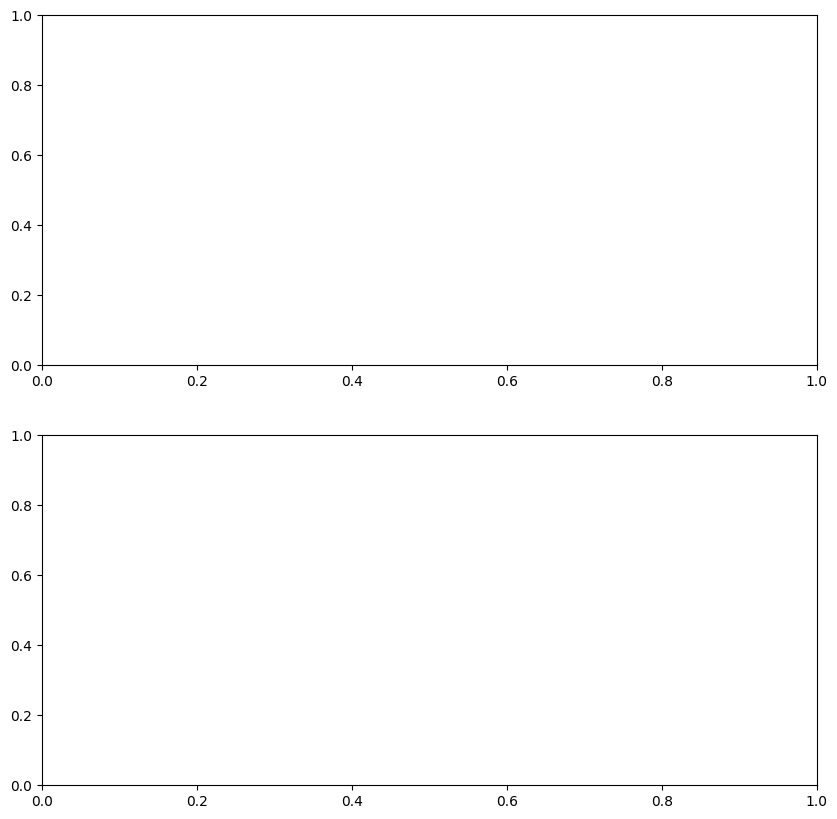

In [32]:
holder = torch.full((32, 16), float('nan'))

fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # Create 2 plots one on top of the other

rounded_tensor = torch.tensor(holder).reshape(32, 16, 3)
rounded_tensor2 = torch.nanmean(rounded_tensor, dim=-1)
sns.heatmap(rounded_tensor2, cmap='viridis', cbar=True, ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Sigmoid Output Parameter per Head')

rounded_tensor = torch.tensor(holder).reshape(32, 16*3)
sns.heatmap(rounded_tensor, cmap='viridis', cbar=True, ax=axs[1])  # Plot on the second subplot
axs[1].set_title('Sigmoid Output Parameter per Head')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()


In [33]:
fine_grained_averages

{((0, 0), 'q0'): 0.008166169747710228,
 ((0, 0), 'q1'): 0.1391802833092456,
 ((0, 1), 'q0'): 0.6620107889175415,
 ((0, 1), 'q1'): 0.19346989516872076,
 ((0, 2), 'q0'): 0.0547848679125309,
 ((0, 2), 'q1'): 0.05436967039594845,
 ((0, 3), 'q0'): 0.003135407343506813,
 ((0, 3), 'q1'): 0.283365858059462,
 ((0, 4), 'q0'): 0.038957659155130386,
 ((0, 4), 'q1'): 0.0681395317066689,
 ((0, 5), 'q0'): 0.005141145549714565,
 ((0, 5), 'q1'): 0.10441788217546988,
 ((0, 6), 'q0'): 0.1915283352136612,
 ((0, 6), 'q1'): 0.09020630319659807,
 ((0, 7), 'q0'): 0.0015736479545012116,
 ((0, 7), 'q1'): 0.0090102304494227,
 ((0, 8), 'q0'): 0.0009859878337010741,
 ((0, 8), 'q1'): 0.5288671872445515,
 ((0, 9), 'q0'): 0.00029091621399857104,
 ((0, 9), 'q1'): 0.1807661817209529,
 ((0, 10), 'q0'): 0.05253368988633156,
 ((0, 10), 'q1'): 0.3640582442891841,
 ((0, 11), 'q0'): 0.0069029200822114944,
 ((0, 11), 'q1'): 0.14995887776722713,
 ((0, 12), 'q0'): 0.006898561492562294,
 ((0, 12), 'q1'): 0.021000105811625112,
 (

In [34]:
for i in fine_grained_averages:
    if i[1] == "q0":
        q = 0
    if i[1] == "q1":
        q = 1
    if i[1] == "q2":
        q = 2
    holder[i[0][0],i[0][1],q] = fine_grained_averages[i]


IndexError: too many indices for tensor of dimension 2

Text(0, 0.5, 'Frequency')

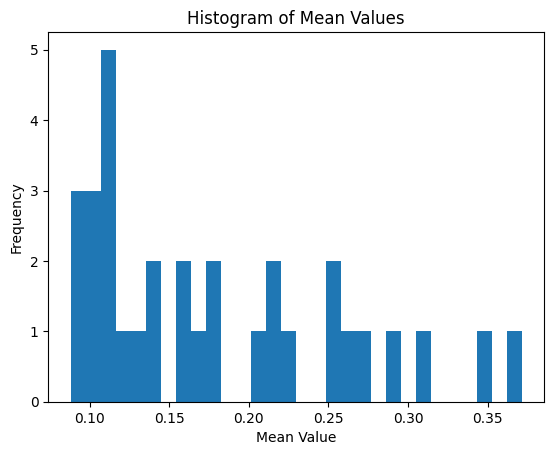

In [90]:
plt.hist(holder.mean(-1).numpy(), bins=30)
plt.title('Histogram of Mean Values')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')


In [178]:

torch.argsort(holder.mean(-1), descending=True)

tensor([25,  3, 30, 23, 31, 10, 24, 21, 22, 27, 28, 13, 29,  0, 26,  8, 11,  4,
         2,  7,  9, 16,  5, 20,  6, 12,  1, 15, 19, 18, 14, 17])

In [127]:
sorted_indices = torch.argsort(holder.view(-1), descending=True)
sorted_coordinates = [[index.item() // holder.size(1), index.item() % holder.size(1)] for index in sorted_indices]


In [128]:
print(sorted_coordinates)


[[5, 14], [10, 12], [6, 0], [25, 2], [5, 7], [8, 3], [4, 4], [21, 15], [29, 15], [25, 0], [17, 14], [1, 13], [9, 2], [1, 9], [6, 11], [3, 8], [7, 1], [23, 15], [27, 8], [2, 6], [1, 5], [13, 15], [3, 10], [10, 9], [4, 6], [26, 7], [24, 15], [9, 10], [10, 0], [11, 3], [4, 1], [5, 10], [8, 1], [19, 14], [18, 13], [4, 15], [16, 7], [18, 15], [30, 7], [10, 2], [7, 7], [24, 6], [3, 15], [3, 2], [8, 4], [16, 5], [2, 12], [22, 12], [15, 5], [20, 9], [9, 12], [2, 0], [7, 8], [13, 9], [23, 12], [6, 1], [13, 3], [6, 7], [3, 5], [23, 6], [19, 1], [22, 5], [24, 1], [0, 8], [5, 0], [22, 11], [17, 12], [29, 7], [4, 10], [12, 11], [25, 8], [15, 3], [29, 12], [7, 6], [7, 0], [3, 6], [26, 0], [6, 2], [11, 8], [4, 11], [19, 0], [17, 5], [25, 15], [30, 12], [3, 11], [22, 4], [1, 10], [7, 4], [12, 5], [24, 7], [11, 14], [23, 1], [9, 8], [12, 13], [8, 11], [3, 3], [22, 8], [2, 14], [21, 11], [27, 3], [2, 7], [8, 8], [15, 0], [16, 8], [22, 0], [18, 3], [27, 1], [21, 0], [9, 6], [6, 6], [8, 9], [9, 4], [5, 13

In [113]:
decoder_coordinates

[[2, 0, 0],
 [2, 0, 1],
 [2, 0, 2],
 [2, 0, 3],
 [2, 0, 4],
 [2, 0, 5],
 [2, 0, 6],
 [2, 0, 7],
 [2, 0, 8],
 [2, 0, 9],
 [2, 0, 10],
 [2, 0, 11],
 [2, 0, 12],
 [2, 0, 13],
 [2, 0, 14],
 [2, 0, 15],
 [2, 0, 16],
 [2, 0, 17],
 [2, 0, 18],
 [2, 0, 19],
 [2, 0, 20],
 [2, 0, 21],
 [2, 0, 22],
 [2, 0, 23],
 [2, 0, 24],
 [2, 0, 25],
 [2, 0, 26],
 [2, 0, 27],
 [2, 0, 28],
 [2, 0, 29],
 [2, 0, 30],
 [2, 0, 31],
 [2, 0, 32],
 [2, 0, 33],
 [2, 0, 34],
 [2, 0, 35],
 [2, 0, 36],
 [2, 0, 37],
 [2, 0, 38],
 [2, 0, 39],
 [2, 0, 40],
 [2, 0, 41],
 [2, 0, 42],
 [2, 0, 43],
 [2, 0, 44],
 [2, 0, 45],
 [2, 0, 46],
 [2, 0, 47],
 [2, 0, 48],
 [2, 0, 49],
 [2, 0, 50],
 [2, 0, 51],
 [2, 0, 52],
 [2, 0, 53],
 [2, 0, 54],
 [2, 0, 55],
 [2, 0, 56],
 [2, 0, 57],
 [2, 0, 58],
 [2, 0, 59],
 [2, 0, 60],
 [2, 0, 61],
 [2, 0, 62],
 [2, 0, 63],
 [2, 0, 64],
 [2, 0, 65],
 [2, 0, 66],
 [2, 0, 67],
 [2, 0, 68],
 [2, 0, 69],
 [2, 0, 70],
 [2, 0, 71],
 [2, 0, 72],
 [2, 0, 73],
 [2, 0, 74],
 [2, 0, 75],
 [2, 0, 76],
 [2, 0, 7

In [35]:
with open('/home/ahojel/visual_prompting_vid/master_rankings.pkl', 'rb') as f:
    master = pickle.load(f)

encoder_coordinates = master["encoder"]["coords_structure"]
decoder_coordinates = master["decoder"]["coords_structure"]

encoder_values = master["encoder"]["values_structure"]
decoder_values = master["decoder"]["values_structure"]

q1 = calculate_quadrant_indices(14, 14, 1)
q2 = calculate_quadrant_indices(14, 14, 2)
q3 = calculate_quadrant_indices(14, 14, 3)
q4 = calculate_quadrant_indices(14, 14, 4)

filtered_encoder_coordinates = []
filtered_encoder_values = []
for encoder_element in range(len(encoder_coordinates)):
    if encoder_coordinates[encoder_element][-1] >= 99:
        filtered_encoder_coordinates.append([encoder_coordinates[encoder_element][0], encoder_coordinates[encoder_element][1], encoder_coordinates[encoder_element][2]-98])
        filtered_encoder_values.append(encoder_values[encoder_element])
    elif encoder_coordinates[encoder_element][-1] == 0:
        filtered_encoder_coordinates.append([encoder_coordinates[encoder_element][0], encoder_coordinates[encoder_element][1], encoder_coordinates[encoder_element][2]])
        filtered_encoder_values.append(encoder_values[encoder_element])

filtered_decoder_coordinates = []
filtered_decoder_values = []

for decoder_element in range(len(decoder_coordinates)):
    pos = decoder_coordinates[decoder_element][-1]
    if pos-1 in q3:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]-98])
        filtered_decoder_values.append(decoder_values[decoder_element])
    if pos-1 in q4:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]-98])
        filtered_decoder_values.append(decoder_values[decoder_element])
    elif pos == 0:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]])
        filtered_decoder_values.append(decoder_values[decoder_element])



# Combine encoder and decoder coordinates and values, then sort them based on the values to get a global ranking
groups_holder = {}
for area_type in ["both"]:#, "decoder", "encoder"]:
    if area_type == "both":
        combined_coords_values = list(zip(filtered_encoder_coordinates + filtered_decoder_coordinates, filtered_encoder_values + filtered_decoder_values))
    elif area_type == "decoder":
        combined_coords_values = list(zip(filtered_decoder_coordinates, filtered_decoder_values))
    elif area_type == "encoder":
        combined_coords_values = list(zip(filtered_encoder_coordinates, filtered_encoder_values))

    combined_coords_values = list(zip(encoder_coordinates + decoder_coordinates, encoder_values + decoder_values))
    
    coords_headrank, group_averages = rank_coordinates_zipped(combined_coords_values)
    coords_quadrank, fine_grained_averages = rank_coordinates_fine_grained(combined_coords_values, q1, q2, q3, q4)
    combined_coords_values.sort(key=lambda x: x[1], reverse=True)  # Assuming higher values have higher ranks

    
holder = torch.full((32, 16), float('nan'))


for i in group_averages:
    holder[i[0],i[1]] = group_averages[i]


In [36]:
from collections import defaultdict
import torch
import pickle


In [57]:
with open('/home/ahojel/visual_prompting_vid/master_rankings.pkl', 'rb') as f:
    master = pickle.load(f)

encoder_coordinates = master["encoder"]["coords"]
decoder_coordinates = master["decoder"]["coords"]

encoder_values = master["encoder"]["values"]
decoder_values = master["decoder"]["values"]

q1 = calculate_quadrant_indices(14, 14, 1)
q2 = calculate_quadrant_indices(14, 14, 2)
q3 = calculate_quadrant_indices(14, 14, 3)
q4 = calculate_quadrant_indices(14, 14, 4)

filtered_encoder_coordinates = []
filtered_encoder_values = []
for encoder_element in range(len(encoder_coordinates)):
    if encoder_coordinates[encoder_element][-1] >= 99:
        filtered_encoder_coordinates.append([encoder_coordinates[encoder_element][0], encoder_coordinates[encoder_element][1], encoder_coordinates[encoder_element][2]-98])
        filtered_encoder_values.append(encoder_values[encoder_element])
    elif encoder_coordinates[encoder_element][-1] == 0:
        filtered_encoder_coordinates.append([encoder_coordinates[encoder_element][0], encoder_coordinates[encoder_element][1], encoder_coordinates[encoder_element][2]])
        filtered_encoder_values.append(encoder_values[encoder_element])

filtered_decoder_coordinates = []
filtered_decoder_values = []

for decoder_element in range(len(decoder_coordinates)):
    pos = decoder_coordinates[decoder_element][-1]
    if pos-1 in q3:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]-98])
        filtered_decoder_values.append(decoder_values[decoder_element])
    if pos-1 in q4:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]-98])
        filtered_decoder_values.append(decoder_values[decoder_element])
    elif pos == 0:
        filtered_decoder_coordinates.append([decoder_coordinates[decoder_element][0], decoder_coordinates[decoder_element][1], decoder_coordinates[decoder_element][2]])
        filtered_decoder_values.append(decoder_values[decoder_element])



# Combine encoder and decoder coordinates and values, then sort them based on the values to get a global ranking
groups_holder = {}
for area_type in ["both"]:#, "decoder", "encoder"]:
    if area_type == "both":
        combined_coords_values = list(zip(filtered_encoder_coordinates + filtered_decoder_coordinates, filtered_encoder_values + filtered_decoder_values))
    elif area_type == "decoder":
        combined_coords_values = list(zip(filtered_decoder_coordinates, filtered_decoder_values))
    elif area_type == "encoder":
        combined_coords_values = list(zip(filtered_encoder_coordinates, filtered_encoder_values))

    combined_coords_values = list(zip(encoder_coordinates + decoder_coordinates, encoder_values + decoder_values))
    
    coords_headrank, group_averages = rank_coordinates_zipped(combined_coords_values)
    coords_quadrank, fine_grained_averages = rank_coordinates_fine_grained(combined_coords_values, q1, q2, q3, q4)
    combined_coords_values.sort(key=lambda x: x[1], reverse=True)  # Assuming higher values have higher ranks

holder = torch.full((32, 16, 3), float('nan'))


for i in fine_grained_averages:
    holder[i[0][0],i[0][1],0 if i[1] == 'q0' else 1 if i[1] == 'q1' else 2]= fine_grained_averages[i]


In [58]:
holder

tensor([[[1.1400, 0.6408,    nan],
         [0.5921, 0.1331,    nan],
         [0.1290, 0.1664,    nan],
         ...,
         [0.6073, 0.1178,    nan],
         [0.3169, 0.3224,    nan],
         [0.1107, 0.1012,    nan]],

        [[0.2512, 0.0313,    nan],
         [0.1411, 0.2243,    nan],
         [0.3852, 0.0404,    nan],
         ...,
         [0.3195, 0.2985,    nan],
         [0.2241, 0.0352,    nan],
         [0.2331, 0.0207,    nan]],

        [[0.1395, 0.2264,    nan],
         [0.1443, 0.0932,    nan],
         [0.1750, 0.1928,    nan],
         ...,
         [0.2891, 0.1817,    nan],
         [0.1970, 0.1463,    nan],
         [0.2967, 0.1139,    nan]],

        ...,

        [[1.0530, 0.0951, 0.1923],
         [0.2134, 0.0884, 0.0984],
         [0.3432, 0.5171, 0.5105],
         ...,
         [0.4514, 0.0873, 0.0848],
         [0.1841, 0.0268, 0.1177],
         [0.6064, 0.2371, 0.5705]],

        [[0.6412, 0.2868, 0.7019],
         [0.1715, 0.0298, 0.0783],
         [0.

In [56]:
for i in fine_grained_averages:
    print(i[1])
    fine_grained_averages[i]
    break

q0


In [43]:
fine_grained_averages[]

1.1399917602539062

In [214]:
print(coords_quadrank[:240])


[[25, 2, 8], [25, 2, 9], [25, 2, 10], [25, 2, 11], [25, 2, 12], [25, 2, 13], [25, 2, 14], [25, 2, 22], [25, 2, 23], [25, 2, 24], [25, 2, 25], [25, 2, 26], [25, 2, 27], [25, 2, 28], [25, 2, 36], [25, 2, 37], [25, 2, 38], [25, 2, 39], [25, 2, 40], [25, 2, 41], [25, 2, 42], [25, 2, 50], [25, 2, 51], [25, 2, 52], [25, 2, 53], [25, 2, 54], [25, 2, 55], [25, 2, 56], [25, 2, 64], [25, 2, 65], [25, 2, 66], [25, 2, 67], [25, 2, 68], [25, 2, 69], [25, 2, 70], [25, 2, 78], [25, 2, 79], [25, 2, 80], [25, 2, 81], [25, 2, 82], [25, 2, 83], [25, 2, 84], [25, 2, 92], [25, 2, 93], [25, 2, 94], [25, 2, 95], [25, 2, 96], [25, 2, 97], [25, 2, 98], [28, 15, 0], [25, 2, 99], [25, 2, 100], [25, 2, 101], [25, 2, 102], [25, 2, 103], [25, 2, 104], [25, 2, 105], [25, 2, 106], [25, 2, 107], [25, 2, 108], [25, 2, 109], [25, 2, 110], [25, 2, 111], [25, 2, 112], [25, 2, 113], [25, 2, 114], [25, 2, 115], [25, 2, 116], [25, 2, 117], [25, 2, 118], [25, 2, 119], [25, 2, 120], [25, 2, 121], [25, 2, 122], [25, 2, 123], [2

In [208]:
for i in fine_grained_averages:
    holder[i[0][0],i[0][1]] = fine_grained_averages[i]


In [210]:
holder[0,0]



tensor([0.6408, 0.6408, 0.6408])

In [38]:
for i in list(fine_grained_averages.keys())

SyntaxError: invalid syntax (3601189983.py, line 1)

In [39]:
flattened_holder = holder.flatten()
sorted_indices = torch.argsort(flattened_holder, descending=True)
second_highest_index = sorted_indices[0].item()  # Get the index of the second largest value
coords_2d = (second_highest_index // holder.shape[1], second_highest_index % holder.shape[1])
coords_2d


(25, 2)

In [388]:
import random

# Pick a random 2D coordinate within the shape (32, 16)
random_coord = (random.randint(0, 31), random.randint(0, 15))
print("Random 2D Coordinate:", random_coord)


Random 2D Coordinate: (17, 14)


In [433]:
holder[21][2]

tensor(0.9448)

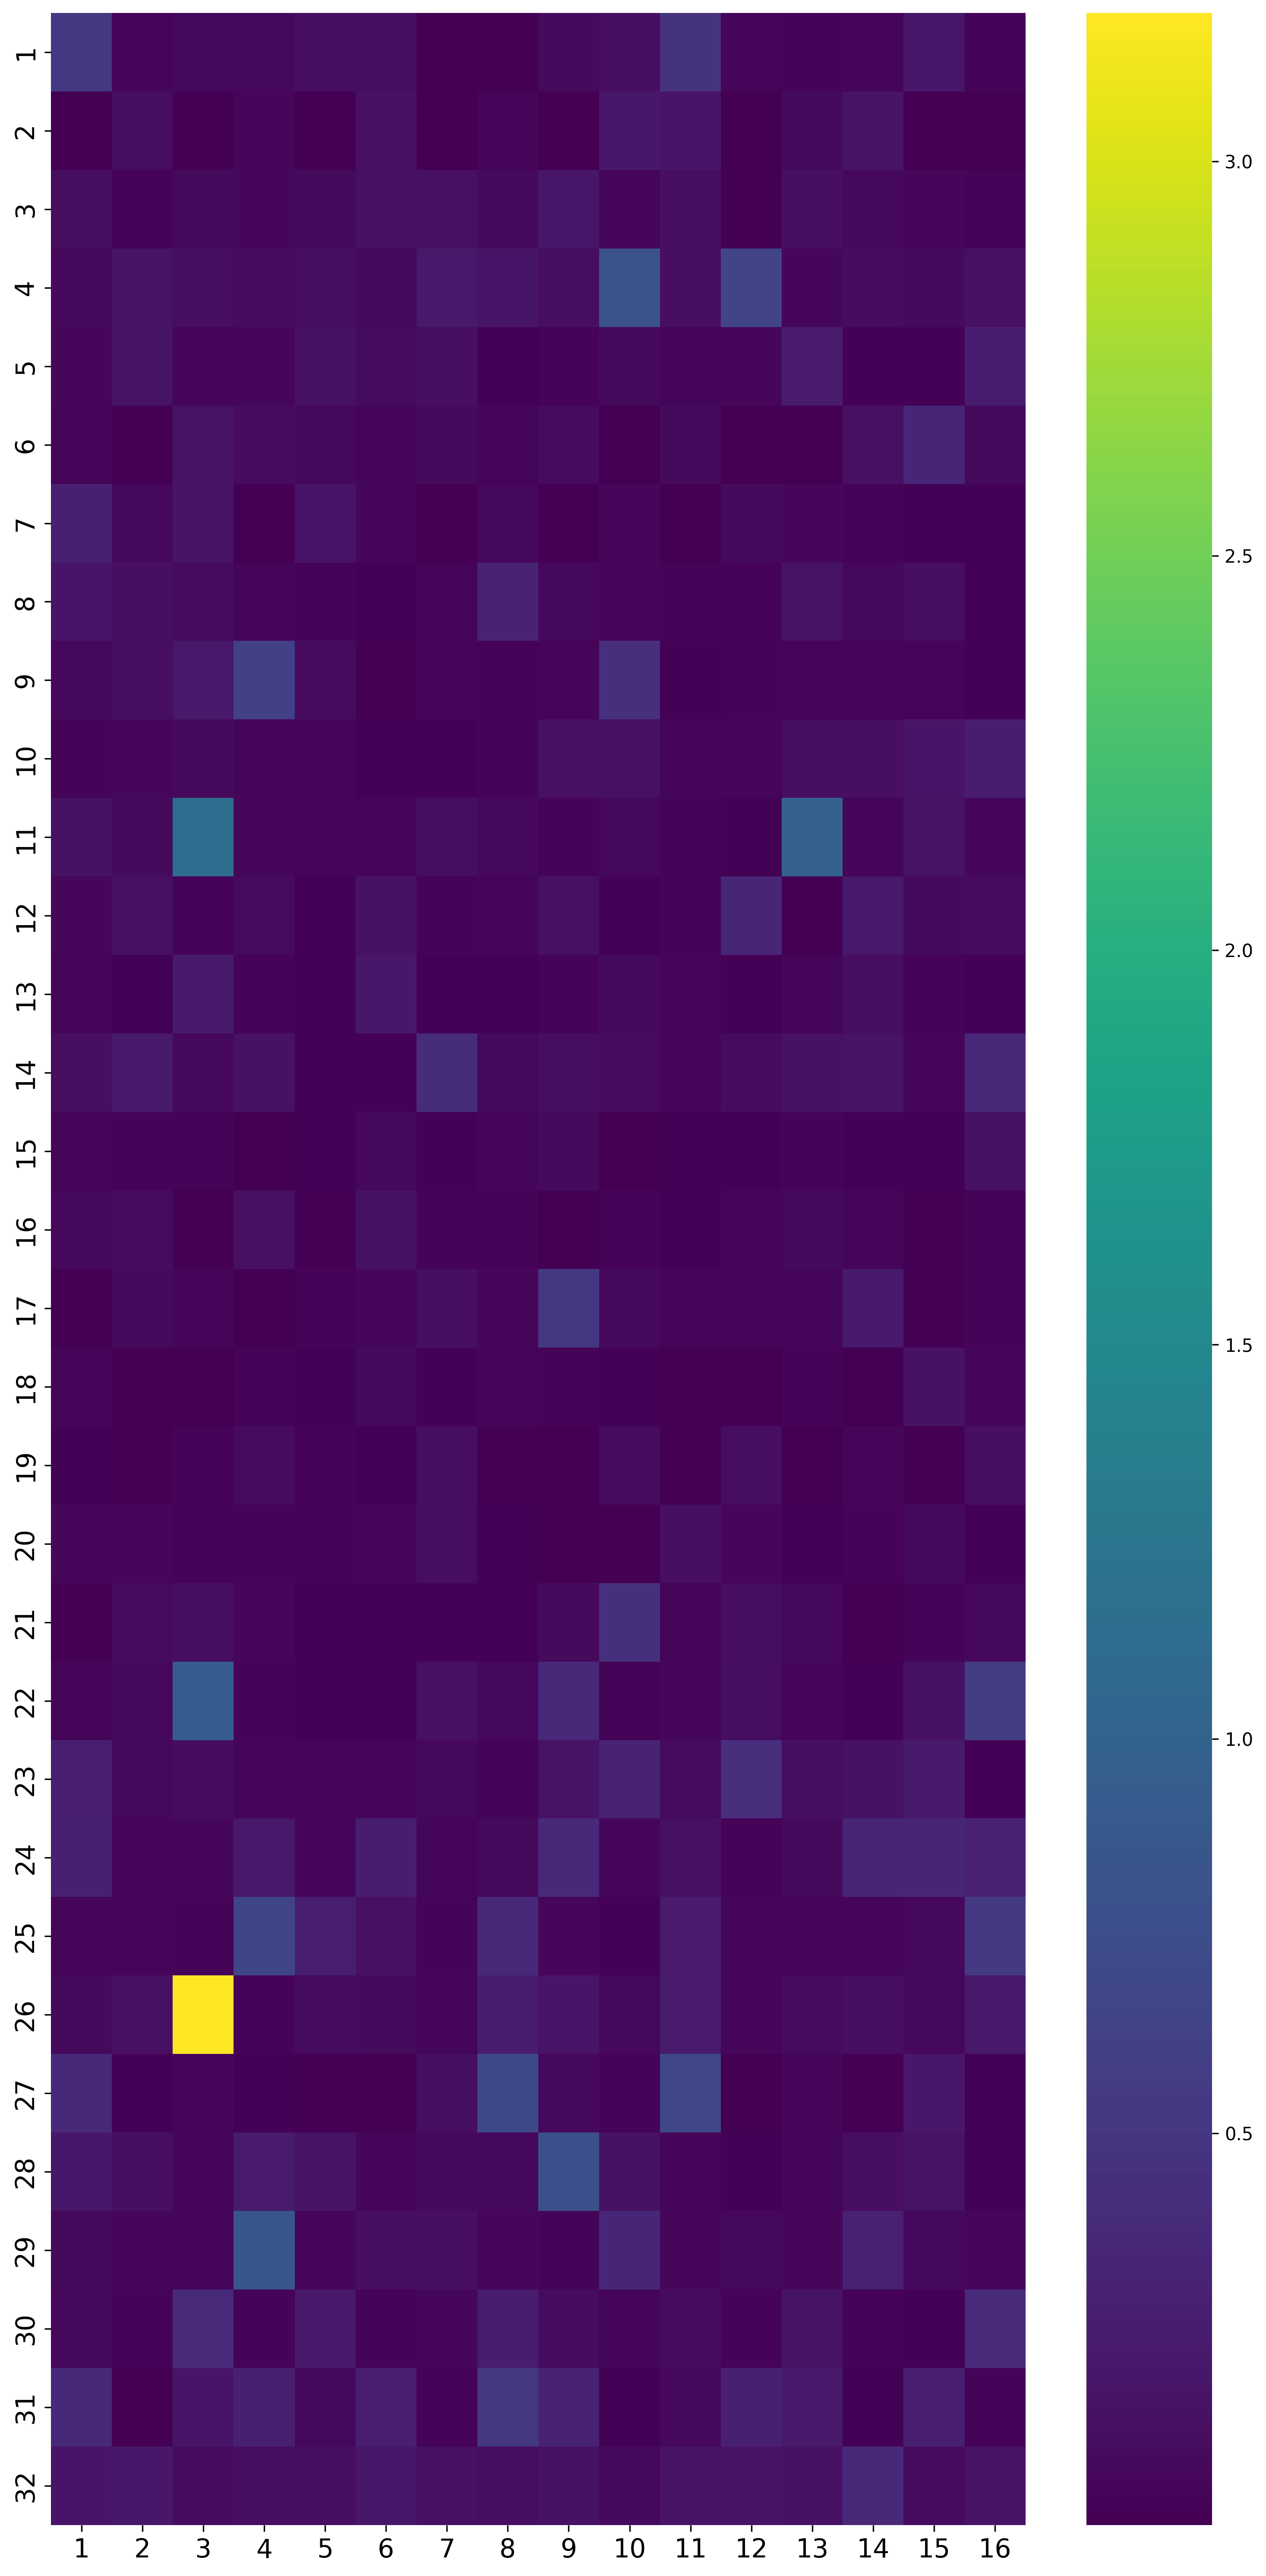

In [175]:
plt.figure(figsize=(10, 20), dpi=300)  # Create a high-quality figure for the plot

sns.heatmap(holder**1.5, cmap='viridis')  # Plot the heatmap of the adjusted holder matrix with annotations
#plt.title('Average Var/Var per Layer', fontsize=20)  # Set the title for the plot with increased font size

# Adjusting the axis to start at 1 instead of 0 and increasing the font size a little larger
plt.xticks(ticks=plt.xticks()[0], labels=[int(x)+1 for x in plt.xticks()[0]], fontsize='x-large')
plt.yticks(ticks=plt.yticks()[0], labels=[int(y)+1 for y in plt.yticks()[0]], fontsize='x-large')
plt.tight_layout()  # Adjust layout to not overlap
plt.show()

In [347]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

with open('/home/ahojel/visual_prompting_vid/output_dir7/best_init_2_structure/log.txt', 'r') as file:

    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue


In [348]:
data2 = pd.DataFrame(data2)


In [349]:
data2

,k,prob,eval_loss,all_areas
0,17,0.20,0.234513,"[[22, 10, 1], [1, 14, 1], [2, 10, 0], [6, 0, 0..."
1,20,0.20,0.305020,"[[8, 6, 0], [9, 1, 1], [9, 12, 1], [2, 10, 0],..."
2,20,0.20,0.254608,"[[13, 15, 1], [1, 14, 1], [6, 0, 0], [3, 5, 0]..."
3,15,0.20,0.264541,"[[8, 6, 0], [9, 12, 1], [2, 10, 0], [6, 0, 0],..."
4,17,0.05,0.249438,"[[22, 10, 1], [1, 14, 1], [2, 10, 0], [6, 0, 0..."
...,...,...,...,...
70,14,0.50,0.289403,"[[9, 1, 1], [9, 12, 1], [16, 0, 1], [3, 15, 1]..."
71,14,0.10,0.285831,"[[9, 1, 1], [9, 12, 1], [16, 0, 1], [3, 15, 1]..."
72,14,0.60,0.289403,"[[9, 12, 1], [9, 1, 1], [16, 0, 1], [3, 15, 1]..."
73,14,0.30,0.285831,"[[9, 12, 1], [9, 1, 1], [16, 0, 1], [3, 15, 1]..."


In [350]:
data2["list_length"] = data2["all_areas"].apply(len)


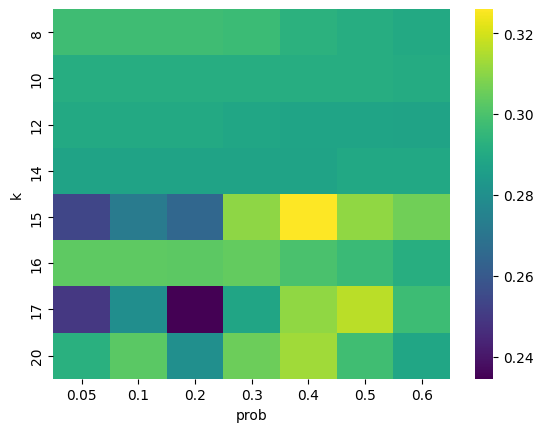

In [351]:
pivot_table = data2.pivot_table(values='eval_loss', index='k', columns='prob', aggfunc='mean')
sns.heatmap(pivot_table, cmap='viridis')
plt.show()


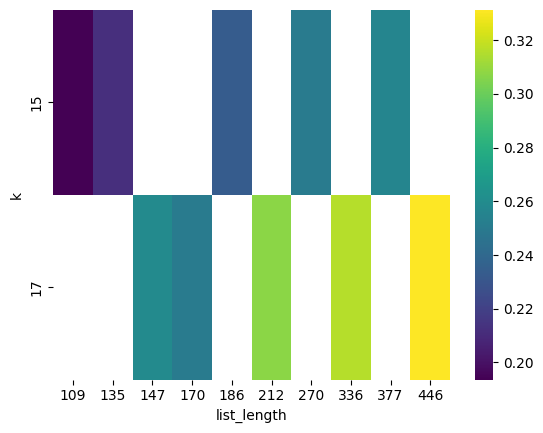

In [261]:
pivot_table = data2.pivot_table(values='eval_loss', index='k', columns='list_length', aggfunc='mean')
sns.heatmap(pivot_table, cmap='viridis')
plt.show()


In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

with open('/home/ahojel/visual_prompting_vid/output_dir7/prometheus-proper-combined15-0.3/log.txt', 'r') as file:

    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue


In [327]:
data2

,iter,eval_loss,all_areas
0,0,0.294174,"[[26, 14, 1], [26, 1, 1], [26, 4, 0], [24, 1, ..."
1,0,0.300405,"[[26, 14, 1], [26, 1, 1], [26, 4, 0], [24, 1, ..."
2,0,0.302169,"[[26, 14, 1], [26, 1, 1], [26, 4, 0], [24, 1, ..."
3,0,0.303415,"[[26, 14, 1], [26, 1, 1], [26, 4, 0], [24, 1, ..."
4,0,0.301845,"[[26, 14, 1], [26, 1, 1], [26, 4, 0], [24, 1, ..."
...,...,...,...
139,8,0.324918,"[[26, 14, 1], [26, 1, 1], [24, 1, 0], [4, 13, ..."
140,8,0.324918,"[[26, 14, 1], [26, 1, 1], [24, 1, 0], [4, 13, ..."
141,8,0.324855,"[[26, 14, 1], [26, 1, 1], [24, 1, 0], [4, 13, ..."
142,8,0.324855,"[[26, 14, 1], [26, 1, 1], [24, 1, 0], [4, 13, ..."


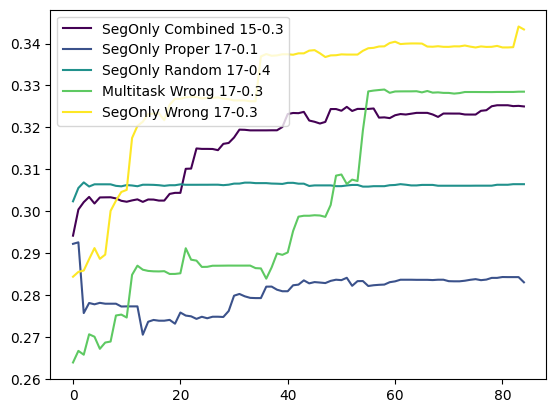

In [389]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

folders = ["prometheus-proper-combined15-0.3", "prometheus-proper-17-0.1", "prometheus-proper-random17-0.4", "prometheus-17-0.3", "prometheus-17-0.3-segonly"]
folder_labels = ["SegOnly Combined 15-0.3", "SegOnly Proper 17-0.1", "SegOnly Random 17-0.4", "Multitask Wrong 17-0.3", "SegOnly Wrong 17-0.3"]
colors = plt.cm.viridis(np.linspace(0, 1, len(folders)))  # Use a color map for different folders

for folder, color, label in zip(folders, colors, folder_labels):
    file_path = f'/home/ahojel/visual_prompting_vid/output_dir7/{folder}/log.txt'
    with open(file_path, 'r') as file:
        data = file.readlines()

    # Convert each line from string to dictionary and get only the first 85
    data2 = []
    for line in data:  # Limit to the first 85 lines
        try:
            data2.append(eval(line.strip()))
        except:
            continue

    data2 = pd.DataFrame(data2)

    plt.plot(data2["eval_loss"][:85], color=color, label=label)

plt.legend()
plt.show()


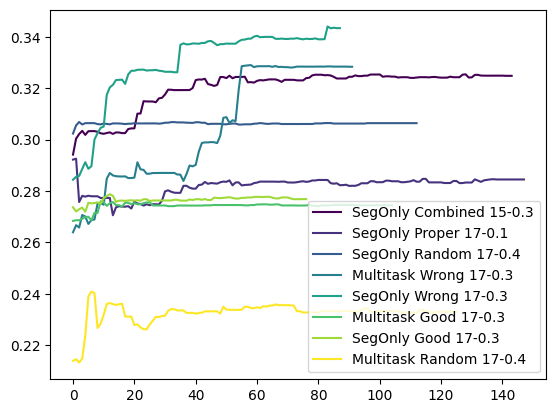

In [497]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

folders = ["prometheus-proper-combined15-0.3", "prometheus-proper-17-0.1", "prometheus-proper-random17-0.4", "prometheus-17-0.3", "prometheus-17-0.3-segonly", "prometheus-proper-17-0.3-multitask", "prometheus-proper-17-0.3", "prometheus-proper-random17-0.4-multitask"]
folder_labels = ["SegOnly Combined 15-0.3", "SegOnly Proper 17-0.1", "SegOnly Random 17-0.4", "Multitask Wrong 17-0.3", "SegOnly Wrong 17-0.3", "Multitask Good 17-0.3", "SegOnly Good 17-0.3", "Multitask Random 17-0.4"]
colors = plt.cm.viridis(np.linspace(0, 1, len(folders)))  # Use a color map for different folders

for folder, color, label in zip(folders, colors, folder_labels):
    file_path = f'/home/ahojel/visual_prompting_vid/output_dir7/{folder}/log.txt'
    with open(file_path, 'r') as file:
        data = file.readlines()

    # Convert each line from string to dictionary and get only the first 85
    data2 = []
    for line in data:  # Limit to the first 85 lines
        try:
            data2.append(eval(line.strip()))
        except:
            continue

    data2 = pd.DataFrame(data2)

    plt.plot(data2["eval_loss"], color=color, label=label)

plt.legend()
plt.show()


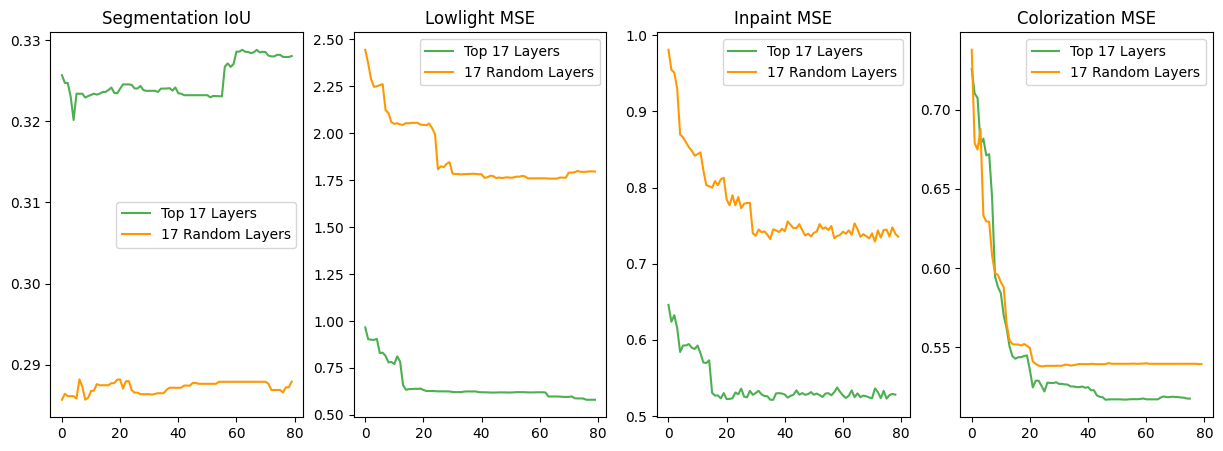

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

folders = ["prometheus-revert-17-0.3", "prometheus-revert-17-0.3-1", "prometheus-revert-17-0.3-3" ,"prometheus-revert-17-0.3-4", "prometheus-random-17-0.3-0", "prometheus-random-17-0.3-1", "prometheus-random-17-0.3-3" ,"prometheus-random-17-0.3-4" ]
folder_labels = ["0", "1", "3", "4", "0r", "1r", "3r","4r"]

# Define custom colors for labels without and with 'r' suffix
colors = ['#4CAF50', '#FF9800']  # Green for labels without 'r', Orange for labels with 'r'

# Determine the number of unique labels without 'r' variants and create a range for each label to include its 'r' variant
unique_labels = sorted(set(label.rstrip('r') for label in folder_labels), key=lambda x: int(x))
label_ranges = {label: [label, label+'r'] for label in unique_labels}

# Create a subplot for each label range to compare changes directly
fig, axs = plt.subplots(1, len(label_ranges), figsize=(15, 5))

for folder, label in zip(folders, folder_labels):
    file_path = f'/home/ahojel/visual_prompting_vid/output_dir7/{folder}/log.txt'
    with open(file_path, 'r') as file:
        data = file.readlines()

    # Convert each line from string to dictionary
    data2 = []
    for line in data:
        try:
            data2.append(eval(line.strip()))
        except:
            continue

    data2 = pd.DataFrame(data2)

    # Determine the index for the subplot based on the label range
    for range_label, labels in label_ranges.items():
        if label in labels:
            plot_index = unique_labels.index(range_label)
            break

    # Assign color based on the presence of 'r' in the label
    color = colors[1] if 'r' in label else colors[0]
    label = "17 Random Layers" if 'r' in label else "Top 17 Layers"

    # Set custom titles based on the range_label
    if range_label == "0":
        title = "Segmentation IoU"
    elif range_label == "1":
        title = "Lowlight MSE"
    elif range_label == "3":
        title = "Inpaint MSE"
    elif range_label == "4":
        title = "Colorization MSE"
    else:
        title = f'Label Range {range_label}'

    axs[plot_index].plot(data2["eval_loss"][:80], color=color, label=label)
    axs[plot_index].set_title(title)
    axs[plot_index].legend()

plt.show()


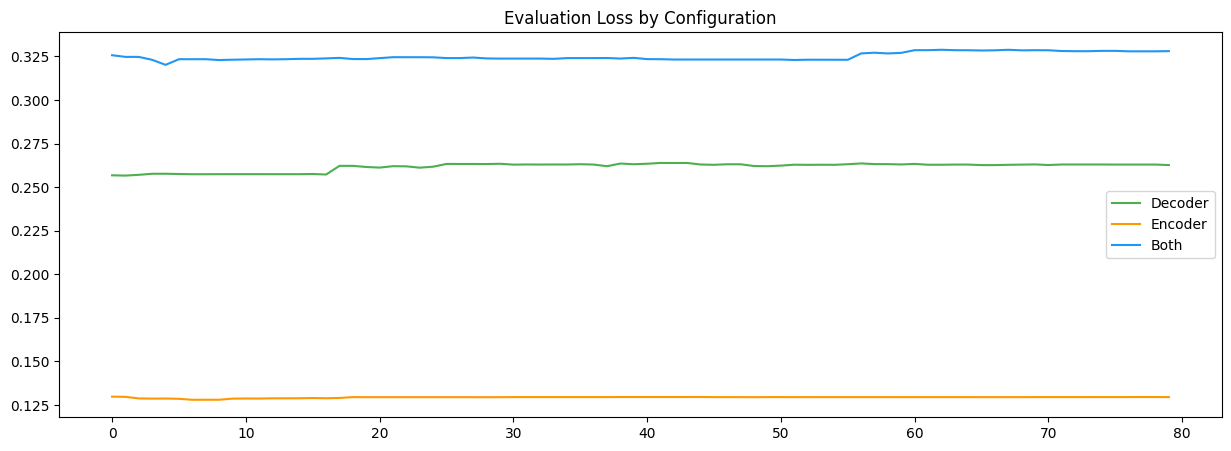

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

folders = ["segonly-decoderonly", "segonly-encoderonly", "prometheus-revert-17-0.3"]
folder_labels = ["Decoder", "Encoder", "Both"]

# Define custom colors for each label
colors = ['#4CAF50', '#FF9800', '#2196F3']  # Green for Decoder, Orange for Encoder, Blue for Both

# Create a single plot to compare all folders directly
fig, ax = plt.subplots(figsize=(15, 5))

for folder, label, color in zip(folders, folder_labels, colors):
    file_path = f'/home/ahojel/visual_prompting_vid/output_dir7/{folder}/log.txt'
    with open(file_path, 'r') as file:
        data = file.readlines()

    # Convert each line from string to dictionary
    data2 = []
    for line in data:
        try:
            data2.append(eval(line.strip()))
        except:
            continue

    data2 = pd.DataFrame(data2)

    ax.plot(data2["eval_loss"][:80], color=color, label=label)

ax.set_title("Evaluation Loss by Configuration")
ax.legend()

plt.show()



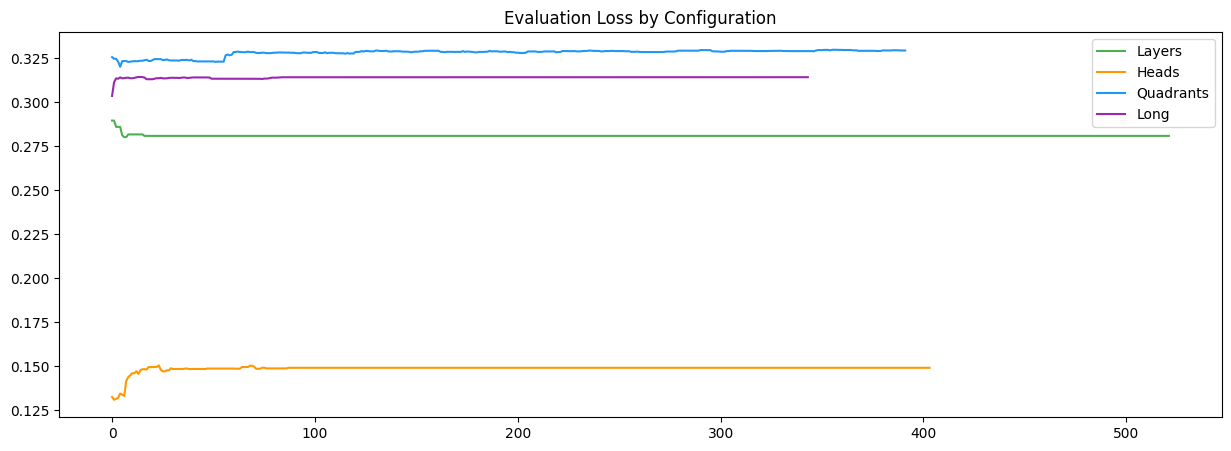

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

folders = ["segonly-layers2", "segonly-heads", "prometheus-revert-17-0.3", "seg-20batch-2"]
folder_labels = ["Layers", "Heads", "Quadrants", "Long"]

# Define custom colors for each label
colors = ['#4CAF50', '#FF9800', '#2196F3', '#9C27B0']  # Green for Decoder, Orange for Encoder, Blue for Both, Purple for Long
# Create a single plot to compare all folders directly
fig, ax = plt.subplots(figsize=(15, 5))

for folder, label, color in zip(folders, folder_labels, colors):
    file_path = f'/home/ahojel/visual_prompting_vid/output_dir7/{folder}/log.txt'
    with open(file_path, 'r') as file:
        data = file.readlines()

    # Convert each line from string to dictionary
    data2 = []
    for line in data:
        try:
            data2.append(eval(line.strip()))
        except:
            continue

    data2 = pd.DataFrame(data2)

    ax.plot(data2["eval_loss"][:80], color=color, label=label)

ax.set_title("Evaluation Loss by Configuration")
ax.legend()

plt.show()



In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

with open('/home/ahojel/visual_prompting_vid/output_dir7/valset_topq/log.txt', 'r') as file:

    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue

data2 = pd.DataFrame(data2)

In [216]:
data2["setup"].unique()

array(['top-quadrants'], dtype=object)

In [217]:
task_mapping = {0: "Segmentation", 1: "Lowlight", 3: "Inpaint", 4: "Colorization"}
data2['task'] = data2['task'].map(task_mapping)
data2

,setup,task,split,eval_loss
0,top-quadrants,Segmentation,0,0.111382
1,top-quadrants,Lowlight,0,4.542817
2,top-quadrants,Inpaint,0,3.740060
3,top-quadrants,Colorization,0,3.866294
4,top-quadrants,Segmentation,1,0.170472
5,top-quadrants,Lowlight,1,5.006668
6,top-quadrants,Inpaint,1,3.971133
7,top-quadrants,Colorization,1,4.427941
8,top-quadrants,Lowlight,2,5.181702
9,top-quadrants,Segmentation,2,0.160558


In [218]:
filtered_data = data2#[data2['task'] != 'Colorization']
pivot_table = filtered_data.pivot_table(index='setup', columns=['task', 'split'], values='eval_loss', aggfunc='first')

# Bold the largest value in each column, except for Segmentation where the maximum value is bolded
def bold_min_or_max(s):
    if s.name[0] == "Segmentation":
        is_max = s == s.max()
    else:
        is_max = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_max]

pivot_table.style.apply(bold_min_or_max)


In [56]:
filtered_data = data2#[data2['task'] != 'Colorization']
pivot_table = filtered_data.pivot_table(index='setup', columns=['task', 'split'], values='eval_loss', aggfunc='first')

# Bold the largest value in each column, except for Segmentation where the maximum value is bolded
def bold_min_or_max(s):
    if s.name[0] == "Segmentation":
        is_max = s == s.max()
    else:
        is_max = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_max]

pivot_table.style.apply(bold_min_or_max)


In [48]:
filtered_data = data2
pivot_table = filtered_data.pivot_table(index='setup', columns=['task', 'split'], values='eval_loss', aggfunc='first')

# Bold the largest value in each column, except for Segmentation where the maximum value is bolded
def bold_min_or_max(s):
    if s.name[0] == "Segmentation":
        is_max = s == s.max()
    else:
        is_max = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_max]

pivot_table.style.apply(bold_min_or_max)


In [49]:

latex_table = pivot_to_latex(pivot_table)
print(latex_table)

\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
task & \multicolumn{4}{r}{Colorization} & \multicolumn{4}{r}{Inpaint} & \multicolumn{4}{r}{Lowlight} & \multicolumn{4}{r}{Segmentation} \\
split & 0 & 1 & 2 & 3 & 0 & 1 & 2 & 3 & 0 & 1 & 2 & 3 & 0 & 1 & 2 & 3 \\
setup &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
mae-vqgan & 0.593696 & 0.623308 & 0.662842 & 0.609507 & 0.499064 & 0.559535 & 0.614436 & 0.553053 & 0.698609 & 0.671212 & 0.726054 & 0.651341 & 0.348467 & 0.376169 & 0.335965 & 0.295841 \\
ours-colorization & 0.516730 & 0.560732 & 0.591669 & 0.549660 & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
ours-inpaint & NaN & NaN & NaN & NaN & 0.520780 & 0.596747 & 0.650100 & 0.589179 & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
ours-lowlight & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & 0.564151 & 0.612353 & 0.635458 & 0.596322 & NaN & NaN & NaN & NaN \\
ours-multitask & 0.692572 & 0.767781 & 0.804421 & 0.758615 & 0.569351 & 0.655585 & 0.72

In [484]:
filtered_data = data2
pivot_table = filtered_data.pivot_table(index='setup', columns=['task', 'split'], values='eval_loss', aggfunc='first')

# Convert pivot table to LaTeX with bold for min/max as per task requirement
def pivot_to_latex(pivot_df):
    latex_str = pivot_df.to_latex()
    
    # Find min/max for each column
    for col in pivot_df.columns:
        if col[0] == 'Segmentation':
            max_val = pivot_df[col].max()
            latex_str = latex_str.replace(str(max_val), '\\textbf{' + str(max_val) + '}')
        else:
            min_val = pivot_df[col].min()
            latex_str = latex_str.replace(str(min_val), '\\textbf{' + str(min_val) + '}')
    
    return latex_str

latex_table = pivot_to_latex(pivot_table)
print(latex_table)


In [452]:


def dataframe_to_latex(df):
    tasks = df['task_name'].unique()
    splits = df['split'].unique()
    
    # Start building the LaTeX table string
    latex_table = "\\begin{table}[ht]\n\\centering\n"
    latex_table += "\\caption{Results of the Copy model on different tasks and splits.}\n"
    latex_table += "\\label{tab:results}\n\\small\n"
    latex_table += "\\begin{tabular}{l" + "c" * (len(tasks) * len(splits) + 1) + "}\n"
    latex_table += "\\toprule\n"
    latex_table += "& & \multicolumn{" + str(len(splits)) + "}{c}{Foreground Segmentation $\\uparrow$} & "
    latex_table += "\multicolumn{" + str(len(splits)) + "}{c}{Single Object Detection $\\uparrow$} \\\\\n"
    latex_table += "\\cmidrule(lr){3-7} \\cmidrule(lr){8-12}\n"
    latex_table += "Model & LPIPS & " + " & ".join(["Split " + str(split) for split in splits]) * 2 + " \\\\\n"
    latex_table += "\\midrule\n"
    
    # Loop through each setup and task, and then fill in the values
    for setup in df['setup'].unique():
        row = [setup]
        for task in tasks:
            for split in splits:
                value = df[(df['setup'] == setup) & (df['task_name'] == task) & (df['split'] == split)]['eval_loss'].values
                if value.size > 0:
                    row.append(f"{value[0]:.2f}" if value[0] is not None else "-")
                else:
                    row.append("-")
        latex_table += " & ".join(row) + " \\\\\n"
        
    latex_table += "\\bottomrule\n"
    latex_table += "\\end{tabular}\n"
    latex_table += "\\end{table}\n"
    
    return latex_table


latex_table = dataframe_to_latex(data2)
print(latex_table)

\begin{table}[ht]
\centering
\caption{Results of the Copy model on different tasks and splits.}
\label{tab:results}
\small
\begin{tabular}{lccccccccccccccccc}
\toprule
& & \multicolumn{4}{c}{Foreground Segmentation $\uparrow$} & \multicolumn{4}{c}{Single Object Detection $\uparrow$} \\
\cmidrule(lr){3-7} \cmidrule(lr){8-12}
Model & LPIPS & Split 0 & Split 1 & Split 2 & Split 3Split 0 & Split 1 & Split 2 & Split 3 \\
\midrule
wrong,17,0.3,segonly & 0.35 & 0.36 & 0.32 & 0.31 & 0.73 & 0.76 & 0.81 & 0.75 & 0.73 & 0.78 & 0.83 & 0.78 & 0.65 & 0.70 & 0.74 & 0.70 \\
wrong,17,0.3,multitask & 0.33 & 0.35 & 0.31 & 0.29 & 0.47 & 0.52 & 0.56 & 0.51 & 0.55 & 0.61 & 0.66 & 0.61 & 0.53 & 0.58 & 0.60 & 0.56 \\
random-240 & 0.11 & 0.04 & 0.17 & 0.10 & 1.53 & 3.74 & 1.78 & 1.45 & 3.69 & 3.64 & 2.94 & 3.97 & 1.95 & 1.40 & 2.90 & 1.03 \\
random-304 & 0.12 & 0.21 & 0.12 & 0.15 & 2.65 & 1.68 & 2.07 & 1.95 & 1.98 & 1.88 & 1.49 & 0.92 & 0.84 & 1.54 & 3.82 & 6.78 \\
mae-vqgan & 0.35 & 0.38 & 0.33 & 0.29 & 0.70 

In [ ]:
\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
task & \multicolumn{4}{r}{0} & \multicolumn{4}{r}{1} & \multicolumn{4}{r}{3} & \multicolumn{4}{r}{4} \\
split & 0 & 1 & 2 & 3 & 0 & 1 & 2 & 3 & 0 & 1 & 2 & 3 & 0 & 1 & 2 & 3 \\
setup &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
mae-vqgan & 0.3485 & 0.3753 & 0.3285 & 0.2880 & 0.6986 & 0.6622 & 0.7259 & 0.6521 & 0.4969 & 0.5552 & 0.6175 & 0.5538 & 0.5937 & 0.6229 & 0.6594 & 0.6056 \\
random-240 & 0.1077 & 0.0422 & 0.1703 & 0.0979 & 1.5298 & 3.7386 & 1.7778 & 1.4540 & 3.6906 & 3.6420 & 2.9440 & 3.9689 & 1.9461 & 1.3966 & 2.8955 & 1.0321 \\
random-304 & 0.1161 & 0.2075 & 0.1203 & 0.1451 & 2.6494 & 1.6840 & 2.0732 & 1.9519 & 1.9803 & 1.8842 & 1.4864 & 0.9207 & 0.8442 & 1.5394 & 3.8170 & 6.7808 \\
wrong,17,0.3,multitask & 0.3300 & 0.3493 & 0.3103 & 0.2949 & 0.4685 & 0.5204 & 0.5624 & 0.5149 & 0.5478 & 0.6095 & 0.6610 & 0.6147 & 0.5267 & 0.5766 & 0.6045 & 0.5634 \\
wrong,17,0.3,segonly & 0.3476 & 0.3629 & 0.3200 & 0.3108 & 0.7291 & 0.7620 & 0.8058 & 0.7481 & 0.7337 & 0.7822 & 0.8277 & 0.7845 & 0.6523 & 0.7011 & 0.7450 & 0.6970 \\
\bottomrule
\end{tabular}

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

with open('/home/ahojel/visual_prompting_vid/output_dir10/xray_results/log-images.txt', 'r') as file:

    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue

data2 = pd.DataFrame(data2)


In [3]:
data2.head(100)


,file_name,task,split,idx,setup,metric
0,1_0_0_enhance,1,0,0,enhance,0.365783
1,1_0_1_enhance,1,0,1,enhance,0.225453
2,1_0_2_enhance,1,0,2,enhance,0.278139
3,1_0_3_enhance,1,0,3,enhance,0.247197
4,1_0_4_enhance,1,0,4,enhance,0.224071
...,...,...,...,...,...,...
95,1_0_95_enhance,1,0,95,enhance,0.298980
96,1_0_96_enhance,1,0,96,enhance,0.241729
97,1_0_97_enhance,1,0,97,enhance,0.088594
98,1_0_98_enhance,1,0,98,enhance,0.381512


In [7]:
data2['file_name'].value_counts()


5_0_0_GT              2
5_0_354_GT            2
5_0_348_GT            2
5_0_349_GT            2
5_0_350_GT            2
                     ..
5_1_487_GT            1
5_1_507_inpaint       1
5_1_448_enhance       1
5_1_252_arithmetic    1
5_3_999_arithmetic    1
Name: file_name, Length: 16000, dtype: int64

In [13]:
data2[(data2['setup'].str.contains('arithmetic'))&(data2["file_name"].str.contains('5_0_0_“multitask_arithmetic”'))]

,file_name,task,split,idx,setup,metric
79674,5_0_0_“multitask_arithmetic”,5,0,0,“multitask_arithmetic”,1.569032
81456,5_0_0_“multitask_arithmetic”,5,0,0,“multitask_arithmetic”,0.750283


In [15]:
data2 = data2.loc[data2.groupby('file_name')['metric'].idxmin()]


In [4]:
data2

,file_name,task,split,idx,setup,metric
0,6_0_0_segment,6,0,0,segment,1.853481
1,6_0_1_segment,6,0,1,segment,5.150882
2,6_0_2_segment,6,0,2,segment,5.235199
3,6_0_3_segment,6,0,3,segment,3.698750
4,6_0_4_segment,6,0,4,segment,4.404143
...,...,...,...,...,...,...
15961,6_3_995_inpaint,6,3,995,inpaint,3.572455
15962,6_3_996_inpaint,6,3,996,inpaint,6.109785
15963,6_3_997_inpaint,6,3,997,inpaint,9.366921
15964,6_3_998_inpaint,6,3,998,inpaint,6.003998


In [20]:
data2['setup'].unique()

array(['multitask', 'taskspecific', 'multitask_0', 'multitask_2',
       'decoder', 'encoder', 'cma_10_0', 'cma_10_1', 'cma_10_3',
       'cma_10_4', 'cma_10_None', '“multitask_arithmetic”', 'MAE-VQGAN',
       'oneshot', 'enhance', 'inpaint'], dtype=object)

In [14]:
data2[data2['setup']=="inpaint"]["metric"].mean(), data2[data2['setup']=="enhance"]["metric"].mean(), data2[data2['setup'].str.contains('arithmetic')]["metric"].mean()

(nan, nan, 0.29876280833291824)

In [25]:
output_folder = '/home/ahojel/visual_prompting_vid/output_dir10/xray_res/filtinp/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [26]:
os.path.exists(output_folder)

True

In [4]:
import os
from PIL import Image

output_folder = '/home/ahojel/visual_prompting_vid/output_dir10/xray_results/filtinp'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for task in [1]:
    # Select the top 100 images based on the condition
    #if task == 0:
    #    task_specific_data = data2[(data2['task'] == task)&(data2['file_name'].str.endswith("c)"))].nlargest(100, 'metric')
    #else:
    task_specific_data = data2[(data2['task'] == task)&(data2['file_name'].str.contains('enhance'))].nsmallest(100, 'metric')
    
    for _, row in task_specific_data.iterrows():
        base_name = row['file_name'].rsplit('_', 1)[0]
        suffixes = ["GT", "enhance"]
        images = []
        
        for suffix in suffixes:
            file_path = os.path.join('/home/ahojel/visual_prompting_vid/output_dir10/xray_results/rip', f'{base_name}_{suffix}.png')
            if os.path.exists(file_path):
                img = Image.open(file_path)
                if suffix == "GT":
                    width, height = img.size
                    bottom_left = img.crop((0, height // 2, width // 2, height))
                    bottom_right = img.crop((width // 2, height // 2, width, height))
                    images.append(bottom_left)
                    images.append(bottom_right)
                else:
                    width, height = img.size
                    bottom_right = img.crop((width // 2, height // 2, width, height))
                    images.append(bottom_right)
        
        if images:
            spacing = 30  # Define spacing between images
            total_width = sum(img.size[0] for img in images) + spacing * (len(images) - 1)
            max_height = max(img.size[1] for img in images)
            
            new_im = Image.new('RGB', (total_width, max_height), "white")  # Set background color to white
            
            x_offset = 0
            for im in images:
                new_im.paste(im, (x_offset,0))
                x_offset += im.size[0] + spacing  # Add spacing after each image
            
            new_im.save(os.path.join(output_folder, f'{base_name}.png'))
            print("saved")


saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved
saved


In [16]:
import os
from PIL import Image

output_folder = '/home/ahojel/visual_prompting_vid/output_dir10/megaresults_images/filt3'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for task in [5]:#[0, 3, 1]:
    task_specific_data = data2[(data2['task'] == task)&(data2['file_name'].str.contains('arithmetic'))].nsmallest(300, 'metric')
    for _, row in task_specific_data.iterrows():
        base_name = row['file_name'].rsplit('_', 2)[0]
        print(row['file_name'].rsplit('_', 2))
        suffixes = ["Ground Truth", "inpaint", "enhance", '“multitask_arithmetic”']
        images = []
        
        for suffix in suffixes:
            file_path = os.path.join('/home/ahojel/visual_prompting_vid/output_dir10/megaresults_images/rip', f'{base_name}_{suffix}.png')
            print(file_path)
            if os.path.exists(file_path):
                img = Image.open(file_path)
                if suffix == "Ground Truth":
                    width, height = img.size
                    bottom_left = img.crop((0, height // 2, width // 2, height))
                    bottom_right = img.crop((width // 2, height // 2, width, height))
                    images.append(bottom_left)
                    images.append(bottom_right)
                else:
                    width, height = img.size
                    bottom_right = img.crop((width // 2, height // 2, width, height))
                    images.append(bottom_right)

        if images:
            spacing = 30  # Define spacing between images
            total_width = sum(img.size[0] for img in images) + spacing * (len(images) - 1)
            max_height = max(img.size[1] for img in images)
            
            new_im = Image.new('RGB', (total_width, max_height), "white")  # Set background color to white
            
            x_offset = 0
            for im in images:
                new_im.paste(im, (x_offset,0))
                x_offset += im.size[0] + spacing  # Add spacing after each image
            
            new_im.save(os.path.join(output_folder, f'{base_name}.png'))
            print("saved")


In [24]:
task_specific_data["file_name"].value_counts()

5_1_333_“multitask_arithmetic”    2
5_0_891_“multitask_arithmetic”    2
5_1_434_“multitask_arithmetic”    2
5_0_496_“multitask_arithmetic”    2
5_0_838_“multitask_arithmetic”    2
                                 ..
5_0_957_“multitask_arithmetic”    1
5_3_678_“multitask_arithmetic”    1
5_1_452_“multitask_arithmetic”    1
5_1_605_“multitask_arithmetic”    1
5_0_851_“multitask_arithmetic”    1
Name: file_name, Length: 139, dtype: int64

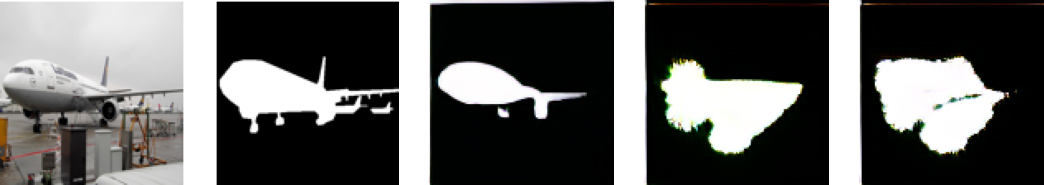

In [157]:
new_im

In [143]:
os.path.join(output_folder, f'{base_name}.png')

'/home/ahojel/visual_prompting_vid/output_dir7/valset_many_images/filtered/0_0_0.png'

In [ ]:

for task in data2['task'].unique():
    if task == 0:
        task_specific_data = data2[(data2['task'] == task) & (data2['setup'] == 'Ours(task specific)')].nlargest(100, 'metric')
    else:
        task_specific_data = data2[(data2['task'] == task) & (data2['setup'] == 'Ours(task specific)')].nsmallest(100, 'metric')
    
    for _, row in task_specific_data.iterrows():
        file_name = row['file_name']
        base_name = file_name.rsplit('_', 1)[0]
        variations = [f for f in os.listdir('/home/ahojel/visual_prompting_vid/output_dir7/valset_many_images/rip') if f.startswith(base_name) and f.endswith('.png')]
        
        images = [Image.open(os.path.join('/home/ahojel/visual_prompting_vid/output_dir7/valset_many_images/rip', variation)) for variation in variations]
        widths, heights = zip(*(i.size for i in images))
        
        total_width = sum(widths)
        max_height = max(heights)
        
        new_im = Image.new('RGB', (total_width, max_height))
        
        x_offset = 0
        for im in images:
            new_im.paste(im, (x_offset,0))
            x_offset += im.size[0]
        
        new_im.save(os.path.join(output_folder, f'{base_name}.png'))


In [164]:
from google.colab import drive
drive.mount('/content/drive')

import shutil
import os

# Define the source and destination paths
source_folder = "/home/ahojel/visual_prompting_vid/output_dir7/valset_many_images/filtered"
destination_folder = "/content/drive/My Drive/visual_prompting_vid_output_filtered"

# Create the destination folder in Google Drive if it does not exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy the folder to Google Drive
shutil.copytree(source_folder, destination_folder)
print(f"Folder copied to Google Drive at {destination_folder}")



ModuleNotFoundError: No module named 'google.colab'

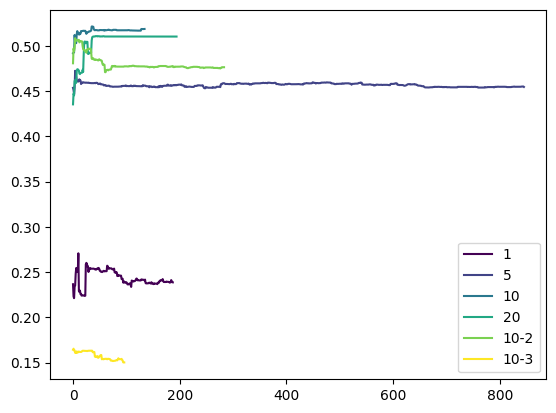

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

folders = ["grs_1", "grs_5", "grs_10", "grs_20", "grs_10_rep", "grs_10_rep2"]
folder_labels = ["1","5","10", "20", "10-2", "10-3"]
colors = plt.cm.viridis(np.linspace(0, 1, len(folders)))  # Use a color map for different folders

for folder, color, label in zip(folders, colors, folder_labels):
    file_path = f'/home/ahojel/visual_prompting_vid/output_dir9/{folder}/log.txt'
    with open(file_path, 'r') as file:
        data = file.readlines()

    # Convert each line from string to dictionary and get only the first 85
    data2 = []
    for line in data:  # Limit to the first 85 lines
        try:
            data2.append(eval(line.strip()))
        except:
            continue

    data2 = pd.DataFrame(data2)

    plt.plot(data2["eval_loss"], color=color, label=label)

plt.legend()
plt.show()


In [2]:
import pandas as pd

folders = ["grs_1", "grs_5", "grs_10", "grs_20", "grs_10_rep"]

for folder in folders:
    file_path = f'/home/ahojel/visual_prompting_vid/output_dir9/{folder}/log.txt'
    with open(file_path, 'r') as file:
        data = file.readlines()

    # Convert each line from string to dictionary
    data2 = []
    for line in data:
        try:
            data2.append(eval(line.strip()))
        except:
            continue

    data2 = pd.DataFrame(data2)
    
    # Find the row with the max eval_loss
    max_eval_loss_row = data2.loc[data2['eval_loss'].idxmax()]
    
    print(f"Folder: {folder}, Max eval_loss all_areas: {max_eval_loss_row['all_areas']}, Max eval_loss: {max_eval_loss_row['eval_loss']}")



Folder: grs_1, Max eval_loss all_areas: [[26, 3, 1], [13, 15, 1], [26, 4, 0], [27, 9, 1], [21, 14, 1], [31, 4, 1], [22, 12, 1], [5, 7, 0], [26, 2, 2], [3, 6, 1], [27, 8, 2], [25, 9, 1], [16, 7, 0], [30, 10, 2], [30, 11, 1], [27, 12, 2], [25, 13, 1], [26, 4, 2], [27, 0, 0], [24, 2, 1], [21, 7, 1], [27, 11, 0], [24, 5, 0], [23, 1, 0], [27, 15, 0], [27, 14, 2], [25, 15, 1], [29, 15, 2], [28, 10, 1], [22, 3, 0], [22, 14, 0], [24, 3, 2], [0, 10, 1], [0, 0, 0], [31, 10, 0], [24, 4, 1], [23, 13, 1], [26, 9, 0], [5, 12, 1], [27, 3, 1], [31, 7, 1], [10, 11, 1], [24, 5, 2], [31, 12, 0], [27, 15, 2], [26, 11, 0], [27, 5, 1], [28, 11, 2], [13, 12, 0], [29, 7, 0], [29, 6, 2], [16, 12, 0], [16, 1, 0], [30, 5, 1], [30, 8, 0], [31, 10, 2], [0, 14, 1], [31, 0, 1], [5, 3, 0], [13, 0, 1], [3, 13, 1], [24, 10, 0], [25, 5, 1], [21, 15, 0], [0, 3, 0], [31, 13, 1], [29, 13, 0], [5, 2, 1], [5, 5, 0], [26, 11, 2], [24, 12, 0], [29, 7, 2], [24, 6, 2], [28, 6, 1], [27, 10, 2], [25, 12, 0], [29, 12, 1], [3, 15, 0

In [3]:
with open('/home/ahojel/visual_prompting_vid/output_dir8/rl_1/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    curr  = eval(line.strip())
    curr["set"] = 1
    try:
        data2.append(curr)
    except:
        continue

with open('/home/ahojel/visual_prompting_vid/output_dir8/rl_5/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()

for line in data:
    curr  = eval(line.strip())
    curr["set"] = 5
    try:
        data2.append(curr)
    except:
        continue

with open('/home/ahojel/visual_prompting_vid/output_dir8/rl_10/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()

for line in data:
    curr  = eval(line.strip())
    curr["set"] = 10
    try:
        data2.append(curr)
    except:
        continue
    


with open('/home/ahojel/visual_prompting_vid/output_dir9/rl_10_two/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()

for line in data:
    curr  = eval(line.strip())
    curr["set"] = 101
    try:
        data2.append(curr)
    except:
        continue
    




with open('/home/ahojel/visual_prompting_vid/output_dir9/rl_20/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()

for line in data:
    curr  = eval(line.strip())
    curr["set"] = 20
    try:
        data2.append(curr)
    except:
        continue


In [6]:
with open('/home/ahojel/visual_prompting_vid/output_dir_reb/reinforce_1shot/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    curr  = eval(line.strip())
    curr["set"] = 1
    try:
        data2.append(curr)
    except:
        continue


In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(data2)


In [9]:
df2 = df

In [6]:
df = df2

In [5]:
df.fillna({"task": "None"}, inplace=True)


In [10]:
df = df[(df["task"] != "None") & (df["task"] != 0)]


In [5]:
df['task'].unique()

array([0, 1, 3, 4])

Task: 0, lr=0.1, init=-1.5, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Train Loss Iter: 590.0
Task: 0, lr=0.1, init=-1.0, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Train Loss Iter: 590.0
Task: 0, lr=0.1, init=-1.5, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Eval Loss Iter: 400.0
Task: 0, lr=0.1, init=-1.0, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Eval Loss Iter: 400.0


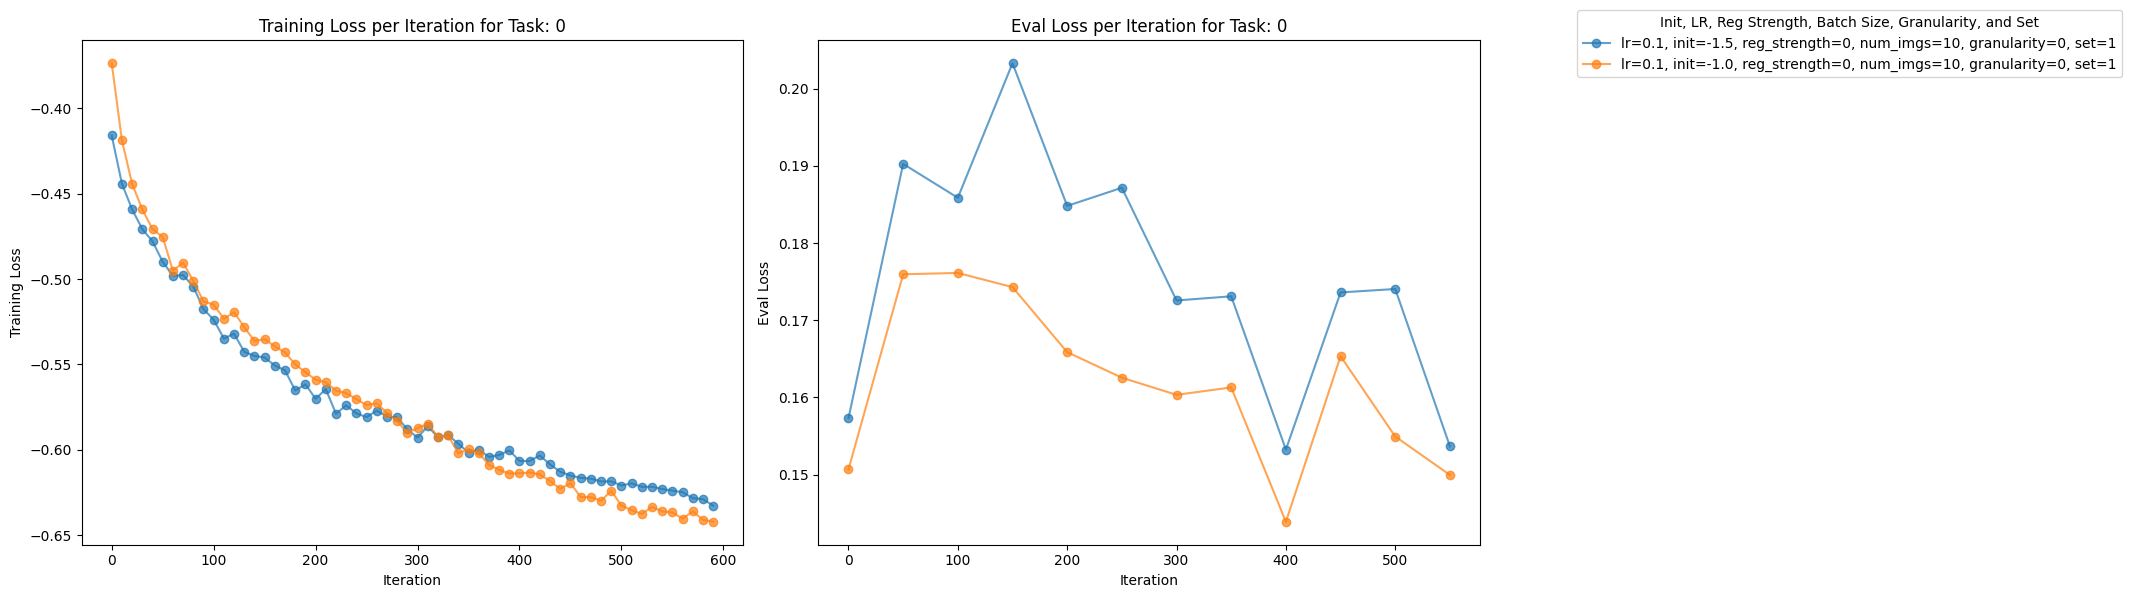

Task: 1, lr=0.1, init=-1.5, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Train Loss Iter: 590.0
Task: 1, lr=0.1, init=-1.0, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Train Loss Iter: 590.0
Task: 1, lr=0.1, init=-1.5, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Eval Loss Iter: 550.0
Task: 1, lr=0.1, init=-1.0, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Eval Loss Iter: 550.0


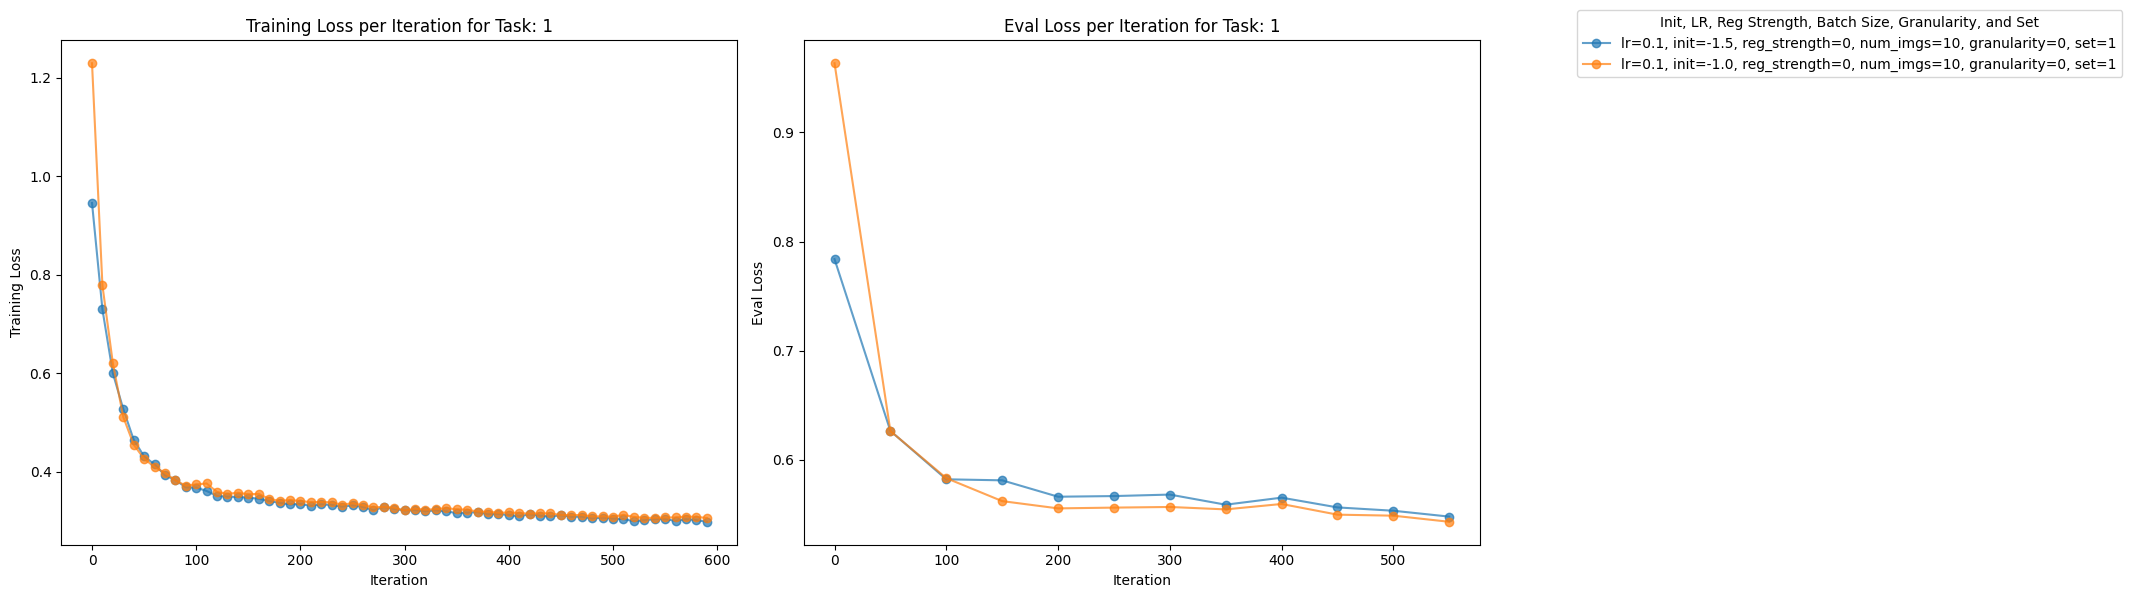

Task: 3, lr=0.1, init=-1.5, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Train Loss Iter: 590.0
Task: 3, lr=0.1, init=-1.0, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Train Loss Iter: 590.0
Task: 3, lr=0.1, init=-1.5, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Eval Loss Iter: 550.0
Task: 3, lr=0.1, init=-1.0, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Eval Loss Iter: 500.0


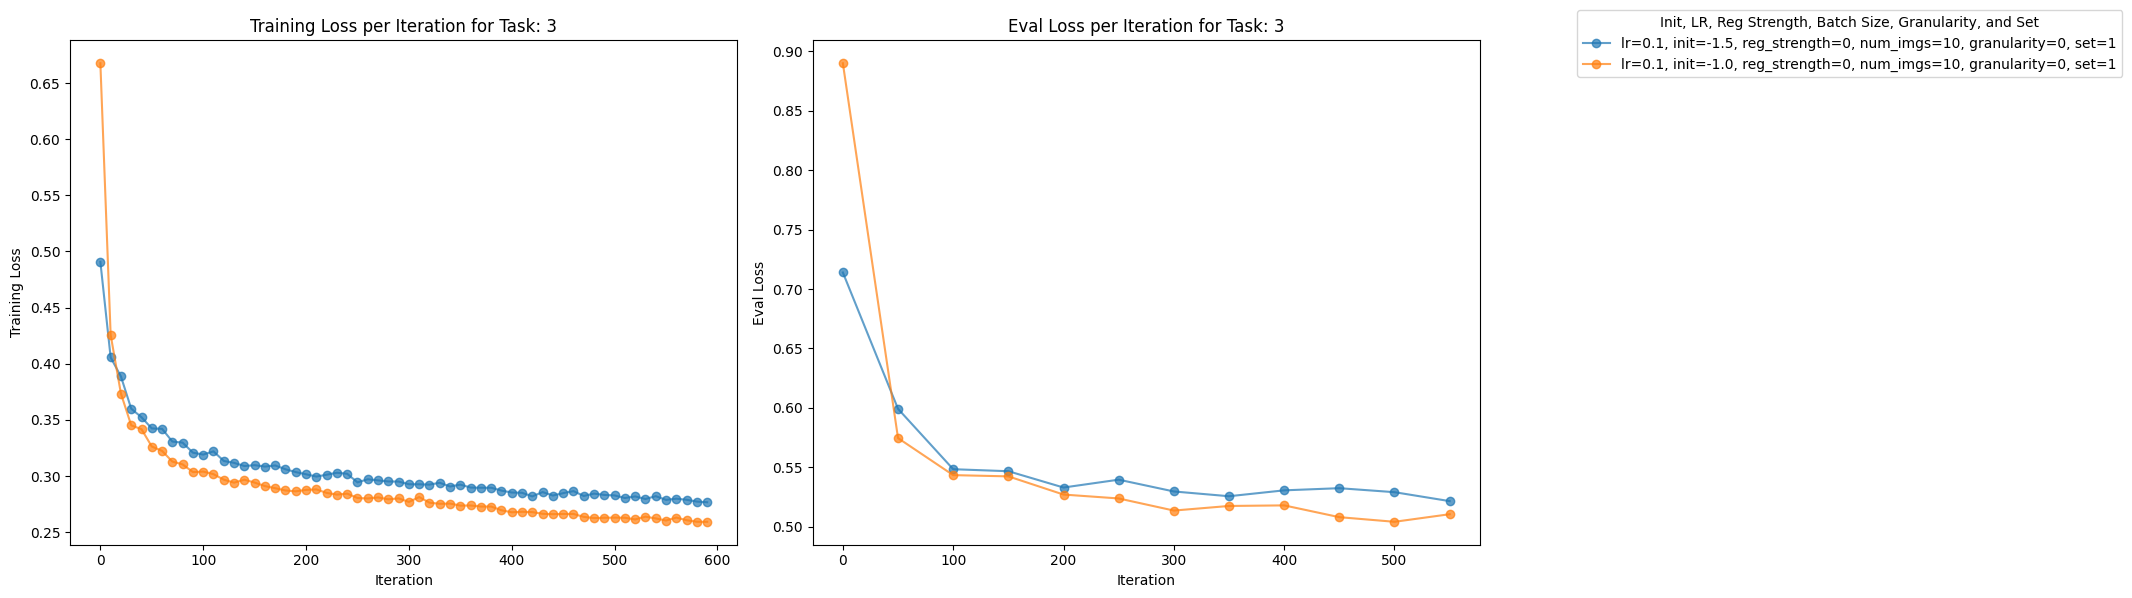

Task: 4, lr=0.1, init=-1.5, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Train Loss Iter: 590.0
Task: 4, lr=0.1, init=-1.0, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Train Loss Iter: 570.0
Task: 4, lr=0.1, init=-1.5, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Eval Loss Iter: 550.0
Task: 4, lr=0.1, init=-1.0, reg_strength=0, num_imgs=10, granularity=0, set=1, Min Eval Loss Iter: 550.0


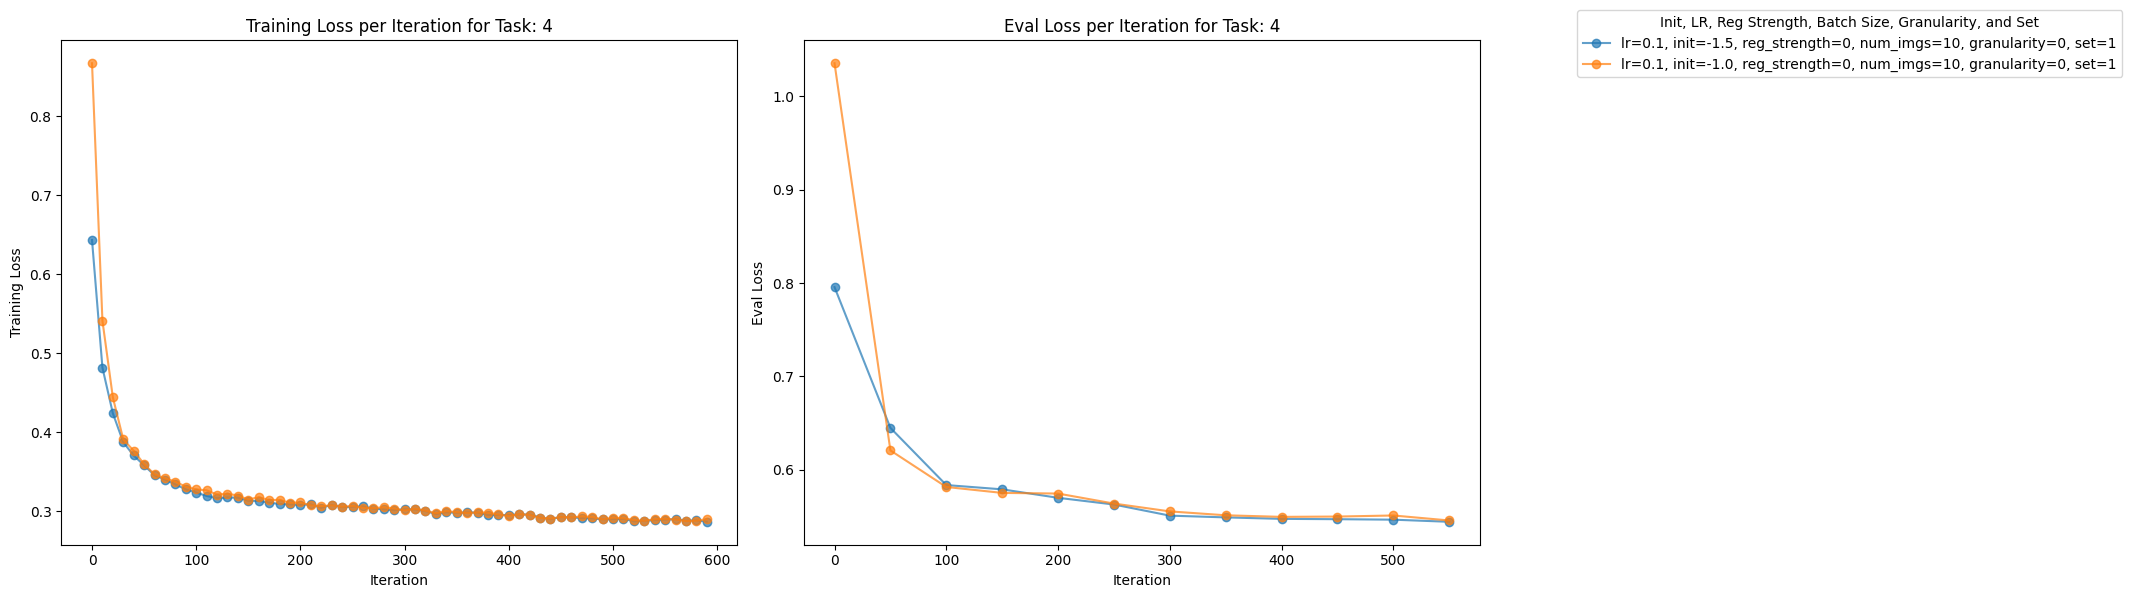

In [10]:
task_values = df['task'].unique()

for task in task_values:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    # First plot for training loss
    df_task = df[df["task"] == task]
    df2 = df_task[~df_task["train_loss"].isna()]
    grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'iter', 'granularity', 'task', 'set'], dropna=False).agg({'train_loss': 'mean'}).reset_index()

    lr_values = grouped_df['lr'].unique()
    init_values = grouped_df['init'].unique()
    reg_strength_values = grouped_df['reg_strength'].unique()
    images_per_batch_values = grouped_df['images_per_batch'].unique()
    granularity_values = grouped_df['granularity'].unique()
    set_values = grouped_df['set'].unique()

    for lr in lr_values:
        for init in init_values:
            for reg_strength in reg_strength_values:
                for images_per_batch in images_per_batch_values:
                    for granularity in granularity_values:
                        for set_val in set_values:
                            subset = grouped_df[(grouped_df['lr'] == lr) & (grouped_df['init'] == init) & (grouped_df['reg_strength'] == reg_strength) & (grouped_df['images_per_batch'] == images_per_batch) & (grouped_df['granularity'] == granularity) & (grouped_df['set'] == set_val)]
                            if not subset.empty:
                                min_iter = subset.loc[subset['train_loss'].idxmin()]['iter']
                                axs[0].plot(subset['iter'], subset['train_loss'], marker='o', label=f'lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}, set={set_val}', alpha=0.7)
                                print(f"Task: {task}, lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}, set={set_val}, Min Train Loss Iter: {min_iter}")
                            else:
                                axs[0].plot([], [], marker='o', label=f'lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}, set={set_val} (No Data)', alpha=0.7)

    axs[0].set_title(f'Training Loss per Iteration for Task: {task}')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Training Loss')

    # Second plot for eval loss
    df2 = df_task[df_task["train_loss"].isna()]
    grouped_df = df2.groupby(['lr', 'init', 'reg_strength', 'images_per_batch', 'iter', 'granularity', 'task', 'set'], dropna=False).agg({'eval_loss': 'mean'}).reset_index()

    for lr in lr_values:
        for init in init_values:
            for reg_strength in reg_strength_values:
                for images_per_batch in images_per_batch_values:
                    for granularity in granularity_values:
                        for set_val in set_values:
                            subset = grouped_df[(grouped_df['lr'] == lr) & (grouped_df['init'] == init) & (grouped_df['reg_strength'] == reg_strength) & (grouped_df['images_per_batch'] == images_per_batch) & (grouped_df['granularity'] == granularity) & (grouped_df['set'] == set_val)]
                            if not subset.empty:
                                min_iter = subset.loc[subset['eval_loss'].idxmin()]['iter']
                                axs[1].plot(subset['iter'], subset['eval_loss'], marker='o', alpha=0.7)
                                print(f"Task: {task}, lr={lr}, init={init}, reg_strength={reg_strength}, num_imgs={images_per_batch}, granularity={granularity}, set={set_val}, Min Eval Loss Iter: {min_iter}")
                            else:
                                axs[1].plot([], [], marker='o', alpha=0.7)

    axs[1].set_title(f'Eval Loss per Iteration for Task: {task}')
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Eval Loss')

    # Adjust legend
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Init, LR, Reg Strength, Batch Size, Granularity, and Set', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()



In [1]:
import pickle

pickle_file_path = '/home/ahojel/visual_prompting_vid/output_dir10/cma_10/0_averages.pkl'
with open(pickle_file_path, 'rb') as file:
    data = pickle.load(file)
print(data)


([6.175621032714844, 6.1837286949157715, 6.184325695037842, 6.183663368225098, 6.18242883682251, 6.184079170227051, 6.184902667999268, 6.183194160461426, 6.181271553039551, 6.18087911605835, 6.187714099884033, 6.1830153465271, 6.185056209564209, 6.183599948883057, 6.181482315063477, 6.182070255279541, 6.183699607849121, 6.183785438537598, 6.179564476013184, 6.182618141174316, 6.180296897888184, 6.178915977478027, 6.185288906097412, 6.183806896209717, 6.196213722229004, 6.182509422302246, 6.187912940979004, 6.183051109313965, 6.1840667724609375, 6.179448127746582, 6.185091972351074, 6.189912796020508, 6.182063579559326, 6.183757305145264, 6.185151100158691, 6.170926094055176, 6.174874782562256, 6.189905643463135, 6.191848278045654, 6.163931369781494, 6.177842617034912, 6.151062488555908, 6.18489408493042, 6.179173469543457, 6.178608417510986, 6.189676284790039, 6.191836833953857, 6.197342395782471, 6.183887004852295, 6.184174537658691, 6.184031009674072, 6.183409214019775, 6.18397521972

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

with open('/home/ahojel/visual_prompting_vid/output_dir10/megaresults_images/log.txt', 'r') as file:

    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue

data2 = pd.DataFrame(data2)


In [23]:
data2.pivot_table(index='load_model', columns=['task', 'split'], values='eval_loss')


task                                                       0             
split                                                      0         1   
load_model                                                               
/home/ahojel/visual_prompting_vid/output_dir10/...  0.375370  0.373149  \
/home/ahojel/visual_prompting_vid/output_dir10/...  0.359714  0.364915   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.244922  0.272553   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.339079  0.339285   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.354325  0.347362   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.266545  0.272331   

task                                                                     
split                                                      2         3   
load_model                                                               
/home/ahojel/visual_prompting_vid/output_dir10/...  0.326568  0.318215  \
/home/ahojel/visual_prompting_vid/output_dir10/...  0.318671  0.310955   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.236299  0.242255   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.302347  0.290932   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.313000  0.288626   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.240156  0.245475   

task                                                       1             
split                                                      0         1   
load_model                                                               
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN  \
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.448566  0.507698   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.417335  0.468173   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.835708  0.972218   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.470075  0.517824   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.462122  0.497520   
/home/ahojel/visual_prompting_vid/output_dir10/...  1.011919  1.125009   

t

In [2]:
data2.pivot_table(index='load_model', columns=['task', 'split'], values='eval_loss')


task                                                       0             
split                                                      0         1   
load_model                                                               
/home/ahojel/visual_prompting_vid/output_dir10/...  0.370520  0.376602  \
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.359167  0.346445   

task                                                                     
split                                                      2         3   
load_model                                                               
/home/ahojel/visual_prompting_vid/output_dir10/...  0.327033  0.321913  \
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.308302  0.290659   

task                                                       1             
split                                                      0         1   
load_model                                                               
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN  \
/home/ahojel/visual_prompting_vid/output_dir10/...  0.417671  0.465435   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.453249  0.498211   

task                                                                     
split                                                      2         3   
load_model                                                               
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN  \
/home/ahojel/visual_prompting_vid/output_dir10/...  0.501692  0.466619   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.530686  0.497257   

task                                                       3             
split                                                      0         1   
load_model                                                               
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN  \
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.408804  0.460751   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.456674  0.508234   

task                                                                     
split                                                      2         3   
load_model                                                               
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN  \
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.504011  0.455771   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...  0.550908  0.510130   

task                                                       4             
split                                                      0         1   
load_model                                                               
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN  \
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN   
/home/ahojel/visual_prompting_vid/output_dir10/...       NaN       NaN  

In [19]:
import pickle
with open('/home/ahojel/visual_prompting_vid/output_dir10/cma_10/None_averages.pkl', 'rb') as file:
    averages_list = pickle.load(file)


In [20]:
holder = torch.full((32, 16, 3), float('nan'))

# Calculate the 25% of the length of the values list to find the lowest 25%
cutoff_index = int(len(averages_list[0]) * 0.25)

# Sort the values and get the indexes of the lowest 25%
sorted_indexes = sorted(range(len(averages_list[0])), key=lambda k: averages_list[0][k])[:cutoff_index]

selected_index_positions = [averages_list[1][index] for index in sorted_indexes]
print("Index positions of the selected 25%:", selected_index_positions)



Index positions of the selected 25%: [[24, 10, 2], [25, 10, 2], [25, 2, 2], [25, 7, 2], [24, 5, 2], [24, 7, 2], [25, 1, 2], [25, 5, 2], [25, 4, 2], [26, 0, 2], [21, 6, 1], [25, 13, 2], [28, 10, 2], [27, 5, 2], [19, 6, 1], [0, 3, 1], [27, 9, 2], [24, 15, 2], [8, 14, 1], [24, 8, 2], [27, 12, 2], [29, 15, 2], [25, 12, 2], [23, 7, 1], [28, 14, 2], [27, 3, 2], [26, 12, 2], [24, 14, 2], [26, 14, 2], [24, 13, 2], [26, 6, 2], [25, 11, 2], [8, 3, 1], [28, 5, 2], [15, 11, 1], [10, 12, 1], [28, 7, 2], [25, 2, 1], [0, 3, 0], [26, 9, 2], [6, 13, 1], [10, 0, 1], [9, 9, 1], [29, 4, 2], [27, 8, 2], [29, 13, 2], [8, 7, 1], [29, 11, 2], [9, 10, 1], [11, 6, 1], [27, 3, 1], [15, 0, 1], [12, 0, 1], [27, 2, 2], [30, 0, 2], [7, 14, 1], [9, 6, 1], [10, 1, 1], [1, 2, 1], [24, 6, 2], [27, 1, 2], [28, 9, 2], [27, 0, 2], [6, 3, 1], [11, 8, 1], [26, 13, 2], [24, 2, 2], [10, 11, 1], [10, 13, 1], [2, 9, 1], [30, 9, 2], [4, 8, 1], [2, 11, 1], [10, 2, 1], [8, 11, 1], [28, 1, 2], [25, 14, 2], [25, 6, 2], [3, 13, 1], [1

In [3]:
len(averages_list[0])

1153

In [7]:
averages_list[-1][-3:]

[[30, 15, 2], [31, 15, 2], None]

In [9]:
import torch
torch.tensor(averages_list[0][:-1])

tensor([6.1756, 6.1837, 6.1843,  ..., 5.9191, 6.1800, 6.1883])

In [32]:
holder.shape

torch.Size([32, 16, 3])

In [10]:
holder = torch.full((32, 16, 3), float('nan'))

for value, index in zip(averages_list[0][:-1], averages_list[1][:-1]):
    print(index,value)
    holder[index[0],index[1],index[2]]=value



[0, 0, 0] 6.175621032714844
[1, 0, 0] 6.1837286949157715
[2, 0, 0] 6.184325695037842
[3, 0, 0] 6.183663368225098
[4, 0, 0] 6.18242883682251
[5, 0, 0] 6.184079170227051
[6, 0, 0] 6.184902667999268
[7, 0, 0] 6.183194160461426
[8, 0, 0] 6.181271553039551
[9, 0, 0] 6.18087911605835
[10, 0, 0] 6.187714099884033
[11, 0, 0] 6.1830153465271
[12, 0, 0] 6.185056209564209
[13, 0, 0] 6.183599948883057
[14, 0, 0] 6.181482315063477
[15, 0, 0] 6.182070255279541
[16, 0, 0] 6.183699607849121
[17, 0, 0] 6.183785438537598
[18, 0, 0] 6.179564476013184
[19, 0, 0] 6.182618141174316
[20, 0, 0] 6.180296897888184
[21, 0, 0] 6.178915977478027
[22, 0, 0] 6.185288906097412
[23, 0, 0] 6.183806896209717
[0, 0, 1] 6.196213722229004
[1, 0, 1] 6.182509422302246
[2, 0, 1] 6.187912940979004
[3, 0, 1] 6.183051109313965
[4, 0, 1] 6.1840667724609375
[5, 0, 1] 6.179448127746582
[6, 0, 1] 6.185091972351074
[7, 0, 1] 6.189912796020508
[8, 0, 1] 6.182063579559326
[9, 0, 1] 6.183757305145264
[10, 0, 1] 6.185151100158691
[11, 0,

/tmp/ipykernel_2569834/4044648616.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rounded_tensor = torch.tensor(holder).reshape(32, 16*3)


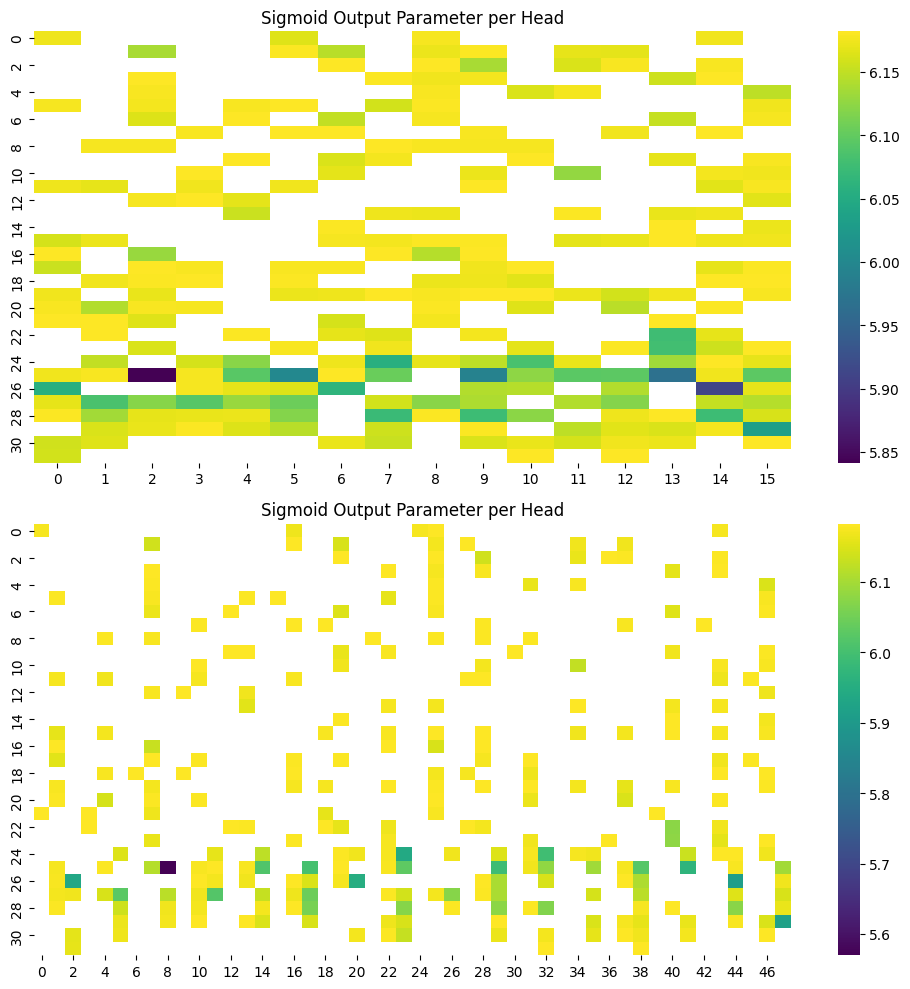

In [68]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # Create 2 plots one on top of the other

rounded_tensor2 = torch.nanmean(holder, dim=-1)
sns.heatmap(rounded_tensor2, cmap='viridis', cbar=True, ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Sigmoid Output Parameter per Head')

rounded_tensor = torch.tensor(holder).reshape(32, 16*3)
sns.heatmap(rounded_tensor, cmap='viridis', cbar=True, ax=axs[1])  # Plot on the second subplot
axs[1].set_title('Sigmoid Output Parameter per Head')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()


/tmp/ipykernel_2569834/4044648616.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rounded_tensor = torch.tensor(holder).reshape(32, 16*3)


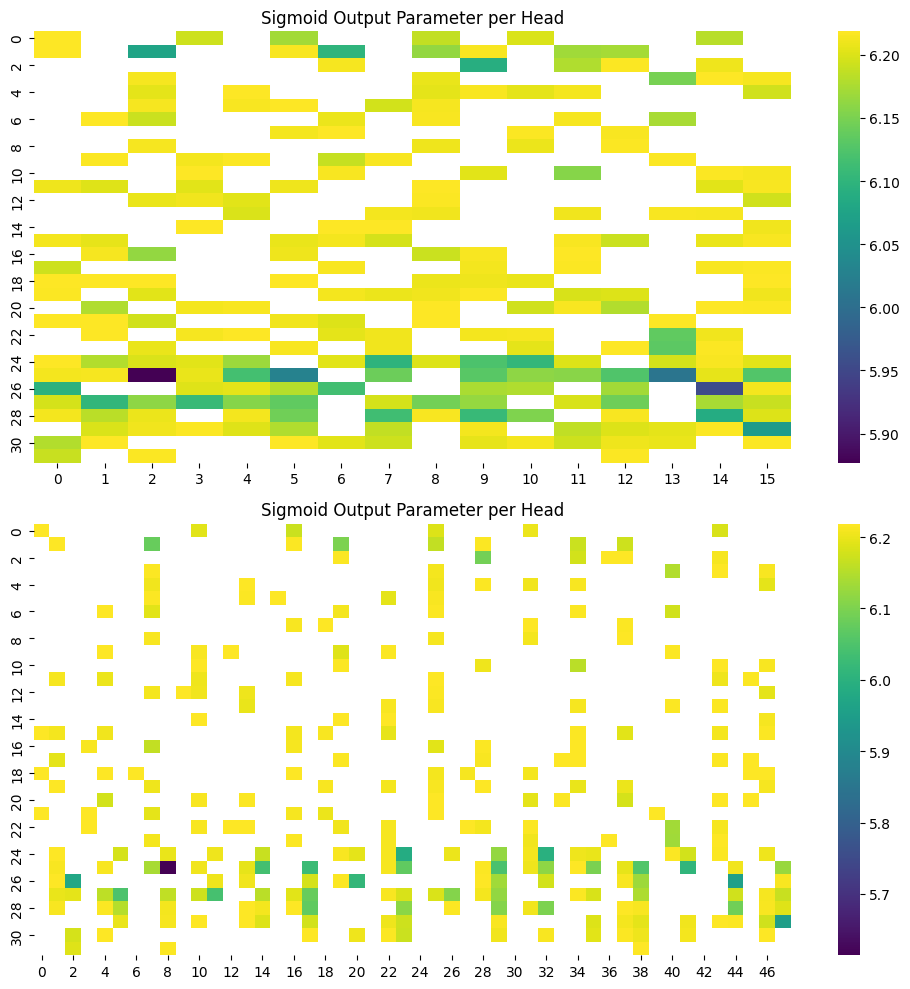

In [56]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # Create 2 plots one on top of the other

rounded_tensor2 = torch.nanmean(holder, dim=-1)
sns.heatmap(rounded_tensor2, cmap='viridis', cbar=True, ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Sigmoid Output Parameter per Head')

rounded_tensor = torch.tensor(holder).reshape(32, 16*3)
sns.heatmap(rounded_tensor, cmap='viridis', cbar=True, ax=axs[1])  # Plot on the second subplot
axs[1].set_title('Sigmoid Output Parameter per Head')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()


In [46]:
averages_list[1]

[[0, 0, 0],
 [1, 0, 0],
 [2, 0, 0],
 [3, 0, 0],
 [4, 0, 0],
 [5, 0, 0],
 [6, 0, 0],
 [7, 0, 0],
 [8, 0, 0],
 [9, 0, 0],
 [10, 0, 0],
 [11, 0, 0],
 [12, 0, 0],
 [13, 0, 0],
 [14, 0, 0],
 [15, 0, 0],
 [16, 0, 0],
 [17, 0, 0],
 [18, 0, 0],
 [19, 0, 0],
 [20, 0, 0],
 [21, 0, 0],
 [22, 0, 0],
 [23, 0, 0],
 [0, 0, 1],
 [1, 0, 1],
 [2, 0, 1],
 [3, 0, 1],
 [4, 0, 1],
 [5, 0, 1],
 [6, 0, 1],
 [7, 0, 1],
 [8, 0, 1],
 [9, 0, 1],
 [10, 0, 1],
 [11, 0, 1],
 [12, 0, 1],
 [13, 0, 1],
 [14, 0, 1],
 [15, 0, 1],
 [16, 0, 1],
 [17, 0, 1],
 [18, 0, 1],
 [19, 0, 1],
 [20, 0, 1],
 [21, 0, 1],
 [22, 0, 1],
 [23, 0, 1],
 [0, 1, 0],
 [1, 1, 0],
 [2, 1, 0],
 [3, 1, 0],
 [4, 1, 0],
 [5, 1, 0],
 [6, 1, 0],
 [7, 1, 0],
 [8, 1, 0],
 [9, 1, 0],
 [10, 1, 0],
 [11, 1, 0],
 [12, 1, 0],
 [13, 1, 0],
 [14, 1, 0],
 [15, 1, 0],
 [16, 1, 0],
 [17, 1, 0],
 [18, 1, 0],
 [19, 1, 0],
 [20, 1, 0],
 [21, 1, 0],
 [22, 1, 0],
 [23, 1, 0],
 [0, 1, 1],
 [1, 1, 1],
 [2, 1, 1],
 [3, 1, 1],
 [4, 1, 1],
 [5, 1, 1],
 [6, 1, 1],
 [7, 1, 1]

In [11]:
holder = torch.full((32, 16, 3), float('nan'))

# Calculate the 25% of the length of the values list to find the lowest 25%
cutoff_index = int(len(averages_list[0]) * 0.25)

# Sort the values and get the indexes of the lowest 25%
sorted_indexes = sorted(range(len(averages_list[0])), key=lambda k: averages_list[0][k])[:cutoff_index]

for index in sorted_indexes:
    value = averages_list[0][index]
    index_position = averages_list[1][index]
    print(index_position, value)
    holder[index_position[0], index_position[1], index_position[2]] = value


[25, 2, 2] 5.552090644836426
[26, 14, 2] 5.8985090255737305
[29, 15, 2] 5.919126510620117
[24, 7, 2] 5.933749198913574
[26, 0, 2] 5.9406418800354
[25, 13, 2] 5.950279712677002
[26, 6, 2] 5.952812671661377
[25, 5, 2] 5.984979152679443
[25, 9, 2] 5.984979629516602
[24, 10, 2] 5.986647605895996
[25, 4, 2] 5.992501258850098
[27, 3, 2] 5.992984294891357
[25, 12, 2] 6.001126289367676
[27, 1, 2] 6.02137565612793
[25, 7, 2] 6.028108596801758
[27, 5, 2] 6.033501625061035
[28, 5, 2] 6.044832706451416
[28, 10, 2] 6.0539679527282715
[28, 14, 2] 6.0607008934021
[28, 7, 2] 6.063985347747803
[27, 8, 2] 6.067774772644043
[28, 9, 2] 6.07009744644165
[25, 11, 2] 6.072874069213867
[22, 13, 1] 6.07917594909668
[25, 15, 2] 6.083683967590332
[23, 13, 1] 6.084589004516602
[1, 2, 1] 6.089575290679932
[25, 10, 2] 6.091338634490967
[26, 9, 2] 6.091846942901611
[27, 9, 2] 6.0933661460876465
[26, 12, 2] 6.09743595123291
[2, 9, 1] 6.106390953063965
[27, 12, 2] 6.110847473144531
[1, 6, 1] 6.113500118255615
[25, 2, 

In [12]:
holder = torch.full((32, 16, 3), float('nan'))

# Calculate the 25% of the length of the values list to find the lowest 25%
cutoff_index = int(len(averages_list[0]) * 0.25)

# Sort the values and get the indexes of the lowest 25%
sorted_indexes = sorted(range(len(averages_list[0])), key=lambda k: averages_list[0][k])[:cutoff_index]

selected_index_positions = [averages_list[1][index] for index in sorted_indexes]
print("Index positions of the selected 25%:", selected_index_positions)



Index positions of the selected 25%: [[25, 2, 2], [26, 14, 2], [29, 15, 2], [24, 7, 2], [26, 0, 2], [25, 13, 2], [26, 6, 2], [25, 5, 2], [25, 9, 2], [24, 10, 2], [25, 4, 2], [27, 3, 2], [25, 12, 2], [27, 1, 2], [25, 7, 2], [27, 5, 2], [28, 5, 2], [28, 10, 2], [28, 14, 2], [28, 7, 2], [27, 8, 2], [28, 9, 2], [25, 11, 2], [22, 13, 1], [25, 15, 2], [23, 13, 1], [1, 2, 1], [25, 10, 2], [26, 9, 2], [27, 9, 2], [26, 12, 2], [2, 9, 1], [27, 12, 2], [1, 6, 1], [25, 2, 1], [29, 7, 2], [24, 9, 2], [27, 2, 2], [28, 1, 2], [16, 2, 1], [27, 4, 2], [24, 4, 2], [30, 7, 2], [10, 11, 1], [27, 1, 1], [3, 13, 1], [27, 7, 2], [27, 15, 2], [24, 13, 2], [20, 1, 1], [16, 8, 1], [24, 1, 2], [29, 5, 2], [26, 5, 2], [29, 15, 1], [27, 11, 2], [20, 12, 1], [27, 14, 2], [26, 10, 2], [4, 15, 1], [30, 0, 2], [29, 11, 2], [29, 4, 2], [27, 3, 1], [17, 0, 1], [0, 5, 1], [6, 13, 1], [6, 6, 1], [2, 11, 1], [1, 8, 1], [31, 0, 2], [19, 12, 1], [28, 15, 2], [1, 11, 1], [1, 12, 1], [29, 12, 2], [6, 2, 1], [30, 11, 2], [24, 6